En este notebook hay que hacer: 

- Codificar las variables categóricas como tipo object (las teníamos tipo float)
- Tener claro qué variables son ordinales y cuáles son nominales
- Desglosar las variables nominales
- Evaluar missings por filas, eliminar los pacientes con >35% y ver cómo quedan los missings por variables
- Mirar las distribuciones de las variables categóricas
- Mirar los outliers de las variables numéricas (tanto qué variables son como los porcentajes de outliers que tienen)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno

In [3]:
df = pd.read_csv('datos_preprocesados.csv')

## CAMBIAR TIPO DE VARIABLES

In [4]:
columnas_a_fecha = [
    'fecha_diag_pe', 'fecha_firma_ci_cardiomom', 'fecha_firma_ci_muestbio', 
    'fecha_nac', 'fur_pre', 'fur_post', 'fecha_eco_1tri', 'fecha_plgf_1tri', 
    'fecha_eco_2tri', 'fecha_ult_deter', 'fecha_parto', 'fecha_exploracion', 
    'fecha_extraccion', 'survey_timestamp_estres','survey_timestamp_scl90r','survey_timestamp_memoria'
]

# Aplicamos la conversión 
# Usamos errors='coerce' por si acaso hay algún dato mal escrito (lo pondrá como NaT)
for col in columnas_a_fecha:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Nuevos tipos de datos:")
print(df[columnas_a_fecha].dtypes)

Nuevos tipos de datos:
fecha_diag_pe               datetime64[ns]
fecha_firma_ci_cardiomom    datetime64[ns]
fecha_firma_ci_muestbio     datetime64[ns]
fecha_nac                   datetime64[ns]
fur_pre                     datetime64[ns]
fur_post                    datetime64[ns]
fecha_eco_1tri              datetime64[ns]
fecha_plgf_1tri             datetime64[ns]
fecha_eco_2tri              datetime64[ns]
fecha_ult_deter             datetime64[ns]
fecha_parto                 datetime64[ns]
fecha_exploracion           datetime64[ns]
fecha_extraccion            datetime64[ns]
survey_timestamp_estres     datetime64[ns]
survey_timestamp_scl90r     datetime64[ns]
survey_timestamp_memoria    datetime64[ns]
dtype: object


In [5]:
categoricas = [
    'estudio_inicial',
    'etnia',
    'concepcion',
    'motivo_induccion',
    'tipo_parto',
    'tipo_cesarea',
    'motivo_cesarea',
    'valvula_aortica',
    'localizacion',
    'tipo_cardiopatia_estructural',
    'ant_fam_enfcardiovasc',
    'que_enf',
    'sexo_rn',
    'ecocardio',
    'fuma_post',
    'unidades_plgf_1tri',
    'tratamiento_diabetes',
    'cigarrillo_masdificil_renunciar',
    'patron_menstrual',
    'parto_previo_mayor37_pre',
    'parto_previo_menor37_pre',
    'aborto_menor20',
    'ant_cir',
    'ant_peg',
    'ant_obito',
    'ant_pe',
    'ant_hellp',
    'ant_cesarea',
    'ant_diabetes_pregest',
    'hta_pregest',
    'sindr_antifosfolipido',
    'enf_autoinm',
    'fuma',
    'alcohol',
    'drogas',
    'plgf_1tri',
    'deter_sflt1_plgf_gest',
    'ini_trabajo_parto_espontaneo',
    'induccion',
    'hemorragia_pospart_transfusion',
    'edema_agudo_pulmon',
    'histerectomia',
    'otras',
    'hipertension_gest',
    'pe',
    'sd_hellp',
    'desprendimiento_placenta',
    'obito_fetal',
    'hemocerebral_ictus',
    'embolia_tep',
    'trombosis_venosa_prof',
    'uci_materna_ucoi',
    'covid',
    'cir',
    'peg',
    'diabetes_gest',
    'insulinizada_1',
    'colestasis_intrahepatica',
    'corioamnionitis',
    'parto_mayor37_post',
    'parto_menor37_post',
    'aborto_menor20_post',
    'ant_cir_post',
    'ant_peg_post',
    'ant_obito_post',
    'ant_pe_post',
    'ant_hellp_post',
    'ant_diabetes_gest',
    'insulinizada_2',
    'ant_colestasis_gest',
    'lactancia_materna',
    'lactancia_materna_actual',
    'ant_cesarea_post',
    'hta_cronica',
    'medicacion_ta',
    'ant_infarto_ictus',
    'diabetes_mellitus_1_2',
    'sindr_antifosfolipido_post',
    'enf_autoinm_post',
    'dislipemia',
    'medicacion_hipolipemiante',
    'menopausia',
    'anticonceptivos_orales',
    'enf_renal_cronica',
    'alcohol_post',
    'drogas_post',
    'notch_pulmonar',
    'valvulopatia',
    'aortica',
    'estenosis_aortica',
    'insuficiencia_aortica',
    'mitral',
    'insuficiencia_mitral',
    'insuficiencia_tricuspidea',
    'segmentarismos',
    'cardiopatia_estructural',
    'complete',
    'muestra_pelo',
    'muestra_pelo_separada',
    'pelo_tenido',
    'trat_pelo_ult3meses',
    'analitica_realizada',
    'dificultad_nofumar_prohibido',
    'fuma_mas_despertar',
    'fuma_enferma',
    'uterinas_p95_1tri',
    'uterinas_p95_eco_2tri',
    'cantidad_fuma_post'
]

df[categoricas] = df[categoricas].astype(object)

df.dtypes


id                                   int64
fecha_firma_ci_cardiomom    datetime64[ns]
fecha_firma_ci_muestbio     datetime64[ns]
fecha_nac                   datetime64[ns]
peso_ini_gest                      float64
                                 ...      
localizacion                        object
motivo_induccion                    object
tomo_durante_gest                   object
tratamiento_diabetes                object
que_enf                             object
Length: 433, dtype: object

In [6]:
# Mapeo Semántico y limpieza de variables categóricas
mapeo_semantico = {
    'etnia': {0: 'Blanca', 1: 'Latina', 2: 'Negra', 3: 'Sureste_asiatico', 4: 'Asia_Oriental', 5: 'Mixto'},
    'estudio_inicial': {0: 'Ninguno', 1: 'BiSC', 2: 'EUROPE', 3: 'Angiocor'},
    'concepcion': {0: 'Espontanea', 1: 'FIV', 2: 'FIV_ovodonacion', 3: 'Inseminacion'},
    'motivo_induccion': {0: 'CIR_PEG', 1: 'Preeclampsia', 2: 'GCP', 3: 'Patologia_materna', 4: 'RPM', 5: 'Otras'},
    'tipo_parto': {0: 'Eutocico', 1: 'Instrumentado', 2: 'Cesarea'},
    'tipo_cesarea': {0: 'Electiva', 1: 'Intercurrente'},
    'motivo_cesarea': {0: 'Estacionado_Fallida', 1: 'PBF', 2: 'Presentacion_Fetal', 3: 'CIR', 4: 'Patologia_materna', 5: 'Cirugia_Uterina_Previa', 6: 'Otras'},
    'valvula_aortica': {0: 'Tricuspide', 1: 'Bicuspide'},
    'localizacion': {0: 'Anterior', 1: 'Lateral', 2: 'Inferior', 3: 'Septal', 4: 'Otro'},
    'tipo_cardiopatia_estructural': {0: 'Derrame', 1: 'Dilatacion_VD', 2: 'Dilatacion_VI', 3: 'Disfuncion_Ventr', 4: 'IT_Ligera', 5: 'Sospecha_CIA', 6: 'VAo_Bicuspide'},
    'ant_fam_enfcardiovasc': {0: 'No', 1: 'Si'},
    'que_enf': {0: 'HTA', 1: 'Infarto_Coronaria', 2: 'Ictus_AVC'},
    'sexo_rn': {0: 'Femenino', 1: 'Masculino'},
    'ecocardio': {0: 'Pendiente', 1: 'No_Desea', 2: 'Si'},
    'fuma_post': {0: 'No', 1: 'Ex_Fumadora', 2: 'Si'},
    'tomo_durante_gest': {0: 'Aspirina', 1: 'Heparina', 2: 'Antihipertensivo', 3: 'Ninguna'},
    'tratamiento_diabetes': {0: 'Oral', 1: 'Insulina', 2: 'Ambos'},
}

# A petición de la compañera, no aplicaremos One-Hot Encoding aquí para poder realizar
# el balanceo de clases y la imputación adecuadamente sobre las categorías originales.
# Lo que haremos es mapear los números a los strings correspondientes para que se entiendan.

nominales_existentes = [col for col in categoricas if col in df.columns]

for col in nominales_existentes:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass
    if col in mapeo_semantico:
        df[col] = df[col].map(mapeo_semantico[col]).fillna(df[col])

# Las convertimos todas a object/category nuevamente
df[nominales_existentes] = df[nominales_existentes].astype(object)

print("Variables categóricas mapeadas (sin One-Hot Encoding de momento).")
print(f"Dimensiones: {df.shape}")


Variables categóricas mapeadas (sin One-Hot Encoding de momento).
Dimensiones: (608, 433)


/var/folders/h2/lk1h3scx0p3cs7sk_k_sxylh0000gn/T/ipykernel_47592/856760523.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].map(mapeo_semantico[col]).fillna(df[col])


Variables ordinales del dataset: 

nivel_estudios, tipo_pe_pre, tipo_pe, tipo_pe_post, riesgo_pe_1tri, tiempo_fumar_cigarrillo_despertar, estadio_enf_renal, num_fuma_dia

- Relacionadas con la dieta:

 'pan', 'verdura_ensalada', 'fruta', 'yogur_leche', 'pasta_arroz', 'aceite_oliva_girasol', 'carne', 'bebida_alcoholica', 'vasos_agua_dia', 'embutidos', 'queso_nbsp', 'bolleria_pasteleria', 'mantequilla', 'bebida_azucarada', 'comida_rapida', 'pescado', 'legumbres', 'frutos_secos', 'frec_afectado_inesperadamente', 'frec_incapaz_controlar_cosas_importantes', 'frec_nervioso_estresado', 'frec_manejando_pequenos_problemas_irritantes', 'frec_afrontando_cambios_importantes', 'frec_seguro_capacidad_manejar_problemas_personales', 'frec_cosas_van_bien', 'frec_no_afrontar_todas_cosas', 'frec_controlar_dificultades', 'frec_todo_bajo_control', 'frec_enfadado_cosas_fuera_control', 'frec_pensado_cosas_por_hacer', 'frec_controlar_forma_pasar_tiempo', 'frec_dificultades_acumuladas'

- Relacionadas con SCL-90-R (las psicológicas):

dolores_musculares, poca_memoria, nervios, desmayos_mareos, poco_interes_sexo, critico_demas, idea_alguien_controla, controlar mis pensamientos, culpo_otros_problemas, problemas_memoria, preocupo_descuido, facilmente_irritable, dolores_corazon_pecho, miedo_espacios_abiertos, debil, pensar_muerte_morirme, impulso_golpear_herir, ganas_romper_cosas, timida_incomoda_demas, atrapada_encerrada, asustarse, explosion_ataques_furia, impulso_accidente, comida_mucha_poca, despertarse_madrugada, levantarse_dormir, pesadillas, sola, cohibida, miedos, sentimientos_heridos,gente_nofavorable, inferior_demas, nauseas_malestar, tension, dolores_brazos_piernas, piensan_mal_mi, ganas_morir, voces_noentienden_otros, falta_confianza, dificil_mente_blanco, entumecida_hormigueo, garganta, sin_futuro, concentrarme, debilidad, pesado_movimientos, pensar_acabar_vida,comer_mas_cuenta, despertarme_pronto, sueno_inquieto, noquieren, sentirme_atrapada, espantarse, estallidos_ira, sentir_ansiosa, discusiones, nerviosa_sola, no_valorada, sola_congente, inquieta, inutil, malo_pasar, gritar_tirarcosas, miedo_desmayarme_gente, aprovechan_mi, pensar_sexo_molesta, sercastigada_pecados, pensamientos_miedo, cuerpo_mal, alejada_personas, culpable, cabeza_nobien

- Relacionadas con MFE-30 (las de memoria):

fallos_memoria_problemas, olvido_puesto_cosas, olvido_lugares, dificultad_seguir_tele, sigo_antiguas_rutinas, comprobar_hecho, olvido_cuando_cosas, olvido_llevar_objetos, olvido_dijeron, leo_leido_antes, divago_conver, no_reconozco_amigos, dificultad_aprender_habilidades, palabra_punta_lengua, olvido_cosas_planeado, olvido_detalles_ayer, olvido_tema_conversacion, pierdo_hilo_leo, olvido_recados, olvido_detalles_mi, confundo_detalles_otras_personas, olvido_anecdotas, olvido_detalles_habituales, olvido_famosos, olvido_donde_guardo, direccion_erronea, hago_dos_veces, repito_hablando, olvido_usar_objeto, olvido_nombre_personas

In [7]:
# Ahora convertimos las variables ordinales a object

# Lista completa de variables ordinales
ordinales = [
    # Variables ordinales generales
    'nivel_estudios',
    'tipo_pe_pre', 
    'tipo_pe',
    'tipo_pe_post',
    'riesgo_pe_1tri',
    'tiempo_fumar_cigarrillo_despertar',
    'num_fuma_dia',
    'estadio_enf_renal',

    # Variables SCL-90-R
    'dolores_cabeza', 'nerviosismo', 'pensamientos_desagradables', 'sensacion_mareo_desmayo', 
    'falta_interes_relsex', 'criticar', 'otro_controla_pensamientos', 'otros_culpables', 
    'dificultad_memorizar', 'preocupada_falta_ganas', 'enojada_malhumorada', 'dolores_pecho', 
    'miedo_espabiertos_calles', 'poca_energia', 'pensar_quitar_vida', 'escuchar_voces', 
    'temblores_cuerpo', 'perder_confianza_mayoria_personas', 'no_ganas_comer', 'llorar_cualquier_cosa', 
    'incomoda_personas_otrosexo', 'atrapada_encerrada', 'asustarme', 'no_controlarme', 
    'miedo_salir_sola', 'sentirme_culpable', 'dolores_espalda', 'no_terminar_cosas', 
    'sentirme_sola', 'sentirme_triste', 'preocuparme_demasiado', 'no_tener_interes', 
    'tener_miedos', 'herida_sentimientos', 'creer_gente_sabe_pensando', 'sentir_no_comprenden', 
    'sentir_no_caigo_bien', 'hacer_despacio', 'corazon_late_fuerte', 'nauseas_dolorestomago', 
    'sentirme_inferior', 'calambres_manos_piernas', 'sentir_vigilan_hablan', 'problemas_dormirme', 
    'controlar_veces_hago', 'dificultad_tomar_decisiones', 'miedo_tren_bus_metro', 'dificultad_respirar', 
    'ataques_frio_calor', 'evitar_lugares_actividades_miedo', 'mente_blanco', 'hormigueos_cuerpo', 
    'nudo_garganta', 'esperanzas_futuro', 'dificultad_concentrarme', 'debilidad_cuerpo', 
    'nerviosa_agitada', 'pesados_brazos_piernas', 'pensar_morir', 'comer_demasiado', 
    'incomoda_miran_hablan', 'pensamientos_no_mios', 'necesitar_golpear_alguien', 
    'madrugar_sin_necesidad', 'repetir_mucho_algo', 'dormir_inquieta', 'necesitar_romper', 
    'pensamientos_noentienden', 'pendiente_piensen', 'incomoda_mucha_gente', 'mucho_esfuerzo', 
    'ataques_miedo_panico', 'sentirme_mal_comiendo_publico', 'discusiones', 'nerviosa_sola', 
    'no_valorada', 'sola_congente', 'inquieta', 'inutil', 'malo_pasar', 'gritar_tirarcosas', 
    'miedo_desmayarme_gente', 'aprovechan_mi', 'pensar_sexo_molesta', 'sercastigada_pecados', 
    'pensamientos_miedo', 'cuerpo_mal', 'alejada_personas', 'culpable', 'cabeza_nobien',
    
    # Variables MFE-30
    'fallos_memoria_problemas', 'olvido_puesto_cosas', 'olvido_lugares', 'dificultad_seguir_tele', 
    'sigo_antiguas_rutinas', 'comprobar_hecho', 'olvido_cuando_cosas', 'olvido_llevar_objetos', 
    'olvido_dijeron', 'leo_leido_antes', 'divago_conver', 'no_reconozco_amigos', 
    'dificultad_aprender_habilidades', 'palabra_punta_lengua', 'olvido_cosas_planeado', 
    'olvido_detalles_ayer', 'olvido_tema_conversacion', 'pierdo_hilo_leo', 'olvido_recados', 
    'olvido_detalles_mi', 'confundo_detalles_otras_personas', 'olvido_anecdotas', 
    'olvido_detalles_habituales', 'olvido_famosos', 'olvido_donde_guardo', 'direccion_erronea', 
    'hago_dos_veces', 'repito_hablando', 'olvido_usar_objeto', 'olvido_nombre_personas',

    # Variables de dieta
    'pan', 'verdura_ensalada', 'fruta', 'yogur_leche', 'pasta_arroz', 'aceite_oliva_girasol', 'carne', 
    'bebida_alcoholica', 'vasos_agua_dia', 'embutidos', 'queso_nbsp', 'bolleria_pasteleria', 'mantequilla', 
    'bebida_azucarada', 'comida_rapida', 'pescado', 'legumbres', 'frutos_secos', 
    
    # Variables de estrés
    'frec_afectado_inesperadamente', 
    'frec_incapaz_controlar_cosas_importantes', 'frec_nervioso_estresado', 'frec_manejado_pequenos_problemas_irritantes', 
    'frec_afrontado_cambios_importantes', 'frec_seguro_capacidad_manejar_problemas_personales', 'frec_cosas_van_bien', 
    'frec_no_afrontar_todas_cosas', 'frec_controlar_dificultades', 'frec_todo_bajo_control', 'frec_enfadado_cosas_fuera_control', 
    'frec_pensado_cosas_por_hacer', 'frec_controlar_forma_pasar_tiempo', 'frec_dificultades_acumuladas'
]

# Verificar qué variables ordinales existen en el dataframe
ordinales_existentes = [col for col in ordinales if col in df.columns]
ordinales_faltantes = [col for col in ordinales if col not in df.columns]

print(f"Variables ordinales encontradas en el DataFrame: {len(ordinales_existentes)}")
print(f"Variables ordinales NO encontradas: {len(ordinales_faltantes)}")

if ordinales_faltantes:
    print("\nVariables ordinales que NO están en el DataFrame:")
    for var in ordinales_faltantes[:10]:
        print(f"  - {var}")
    if len(ordinales_faltantes) > 10:
        print(f"  ... y {len(ordinales_faltantes) - 10} más")

# Convertir variables ordinales a tipo object
print("\nConvirtiendo variables ordinales a tipo 'object'")
if ordinales_existentes:
    df[ordinales_existentes] = df[ordinales_existentes].astype(object)

# Verificación
if ordinales_existentes:
    print("\nVerificación de tipos de datos (primeras 10 variables ordinales):")
    print(df[ordinales_existentes[:10]].dtypes)

# Ajustar categorías 'Leve'-'Grave' o 'Leve'-'Moderado'-'Severo' a ordinales numéricas
mapeo_ordinal = {'Leve': 0, 'Moderado': 1, 'Grave': 2, 'Severo': 2}
if 'tipo_pe_pre' in df.columns:
    df['tipo_pe_pre'] = df['tipo_pe_pre'].replace(mapeo_ordinal)

# Asegurar que las ordinales sean numéricas para poder mantener el orden
for col in ordinales_existentes:
    try:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    except:
        pass


Variables ordinales encontradas en el DataFrame: 160
Variables ordinales NO encontradas: 0

Convirtiendo variables ordinales a tipo 'object'

Verificación de tipos de datos (primeras 10 variables ordinales):
nivel_estudios                       object
tipo_pe_pre                          object
tipo_pe                              object
tipo_pe_post                         object
riesgo_pe_1tri                       object
tiempo_fumar_cigarrillo_despertar    object
num_fuma_dia                         object
estadio_enf_renal                    object
dolores_cabeza                       object
nerviosismo                          object
dtype: object


/var/folders/h2/lk1h3scx0p3cs7sk_k_sxylh0000gn/T/ipykernel_47592/4115134752.py:89: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tipo_pe_pre'] = df['tipo_pe_pre'].replace(mapeo_ordinal)
/var/folders/h2/lk1h3scx0p3cs7sk_k_sxylh0000gn/T/ipykernel_47592/4115134752.py:94: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Nota: ahora aparecen 167 categóricas porque las nominales (al aplicar dummies) ya no son categóricas. Entonces son 160 ordinales y 7 que ya eran categóricas

In [8]:
df.select_dtypes('object', 'category').columns

Index(['etnia', 'concepcion', 'parto_previo_mayor37_pre',
       'parto_previo_menor37_pre', 'aborto_menor20', 'ant_cir', 'ant_peg',
       'ant_obito', 'ant_pe', 'ant_hellp',
       ...
       'dificultad_nofumar_prohibido', 'cigarrillo_masdificil_renunciar',
       'fuma_mas_despertar', 'fuma_enferma', 'estudio_inicial', 'localizacion',
       'motivo_induccion', 'tomo_durante_gest', 'tratamiento_diabetes',
       'que_enf'],
      dtype='object', length=115)

# ANÁLISIS DE MISSINGS

In [9]:
# Calculamos el porcentaje de valores faltantes por fila
missing_rows_pct = df.isnull().mean(axis=1) * 100 # Se usa .mean porque .isnull devuelve True/False, y al hacer la media se obtiene el número total de True (missings) por fila

# Identificamos las filas con más del 35% de valores faltantes
filas_a_eliminar = missing_rows_pct[missing_rows_pct > 35]
filas_a_pensar = missing_rows_pct[(missing_rows_pct > 20) & (missing_rows_pct < 35)]
print(f"Número de filas con >35% de missings (se eliminan): {len(filas_a_eliminar)}")
print(f"Filas con 20-35% de missings: \n{filas_a_pensar}")

# Eliminamos las filas con más del 35% de valores faltantes
df_cleaned = df[missing_rows_pct <= 35].copy()

Número de filas con >35% de missings (se eliminan): 149
Filas con 20-35% de missings: 
0      24.018476
3      23.556582
4      20.323326
9      26.789838
28     23.787529
         ...    
601    31.870670
602    28.175520
603    31.639723
604    31.639723
605    32.794457
Length: 166, dtype: float64


In [10]:
df_cleaned.shape

(459, 433)

In [11]:
# Vemos cómo queda el análisis de missings por columnas ahora

# Estas son las columnas con >35% y 20-35% de missings después de eliminar filas
missing_col_pct = df_cleaned.isnull().mean() * 100
cols_mas_35 = missing_col_pct[missing_col_pct > 35]
cols_20_35 = missing_col_pct[(missing_col_pct >= 20) & (missing_col_pct <= 35)]

print(f"Columnas con >35% de missings: {len(cols_mas_35)}")
print(f"Columnas con 20-35% de missings: {len(cols_20_35)}")

Columnas con >35% de missings: 74
Columnas con 20-35% de missings: 42


In [12]:
print(f"Columnas con >35% de missings: \n{cols_mas_35}")

Columnas con >35% de missings: 
num_partos_mayor37_pre      62.745098
num_partos_menor37_pre      96.514161
num_abortos_menor20_pre     79.084967
tipo_pe_pre                 94.553377
fecha_plgf_1tri             81.481481
                              ...    
score_fumar                 91.503268
localizacion               100.000000
motivo_induccion            51.416122
tratamiento_diabetes        98.474946
que_enf                     56.644880
Length: 74, dtype: float64


In [13]:
print(f"Columnas con 20-35% de missings: \n{cols_20_35}")

Columnas con 20-35% de missings: 
fecha_ult_deter                                   26.579521
eg_deter_sflt1_plgf                               26.579521
valor_sflt1                                       25.272331
valor_plgf                                        25.272331
ratio_sflt1_plgf                                  25.272331
ant_diabetes_gest                                 23.529412
ant_colestasis_gest                               22.440087
tiempo_anticonceptivos_orales                     30.936819
valvula_aortica                                   25.272331
tiempo_hemipresion_pulmonar                       21.350763
ad_volumen                                        20.479303
diam_longitudinal_vd                              26.797386
tiempo_deceleracion_vm                            20.043573
presion_estimada_ad                               26.361656
gc_tsvi                                           24.400871
ic_tsvi                                           25.490196
vs_cam

In [14]:
cols_20_35[117:132]

Series([], dtype: float64)

In [15]:
df_cleaned2 = df_cleaned.drop(columns=cols_mas_35.index)
df_cleaned2.shape

(459, 359)

- df = datos preprocesados de reunion 1 (shape (608, 565)), (hay 382 numéricas, 167 categóricas y 16 datetime). 
- df_cleaned = datos preprocesados eliminando las variables con mas de 35% de missings (shape (582, 565)), (hay 382 numéricas, 167 categóricas y 16 datetime)
- df_cleaned2 = datos preprocesados eliminando las variables y las columnas con mas de 35% de missings (shape (582, 521)), (hay 349 numéricas, 159 categóricas y 13 datetime)

### Matriz de missings (de df_cleaned)

#### Variables numéricas

In [16]:
# Seleccionamos solo las variables numéricas para el análisis de missings
df_missing_num = df_cleaned.select_dtypes(include=['float64', 'int64'])
df_missing_num.shape

(459, 302)

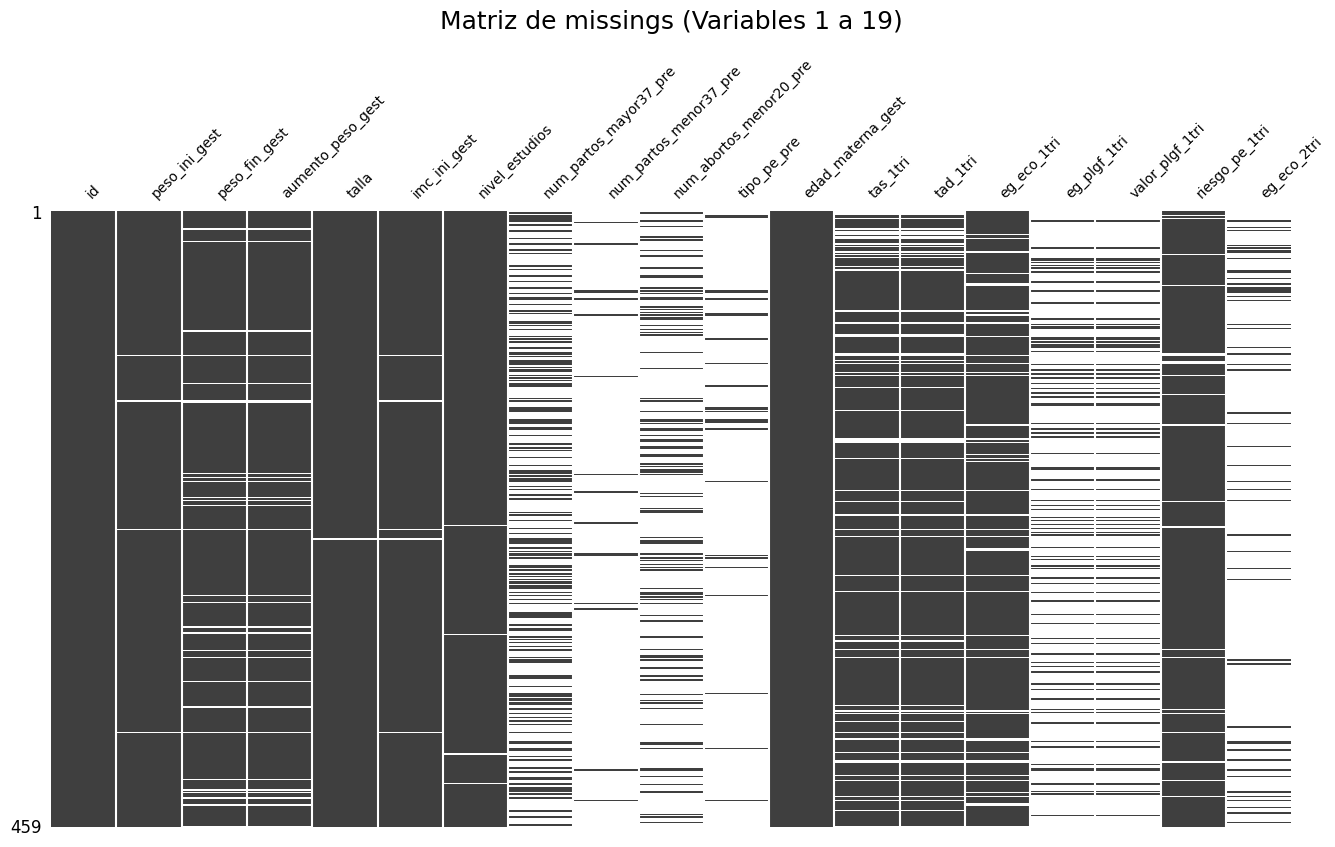

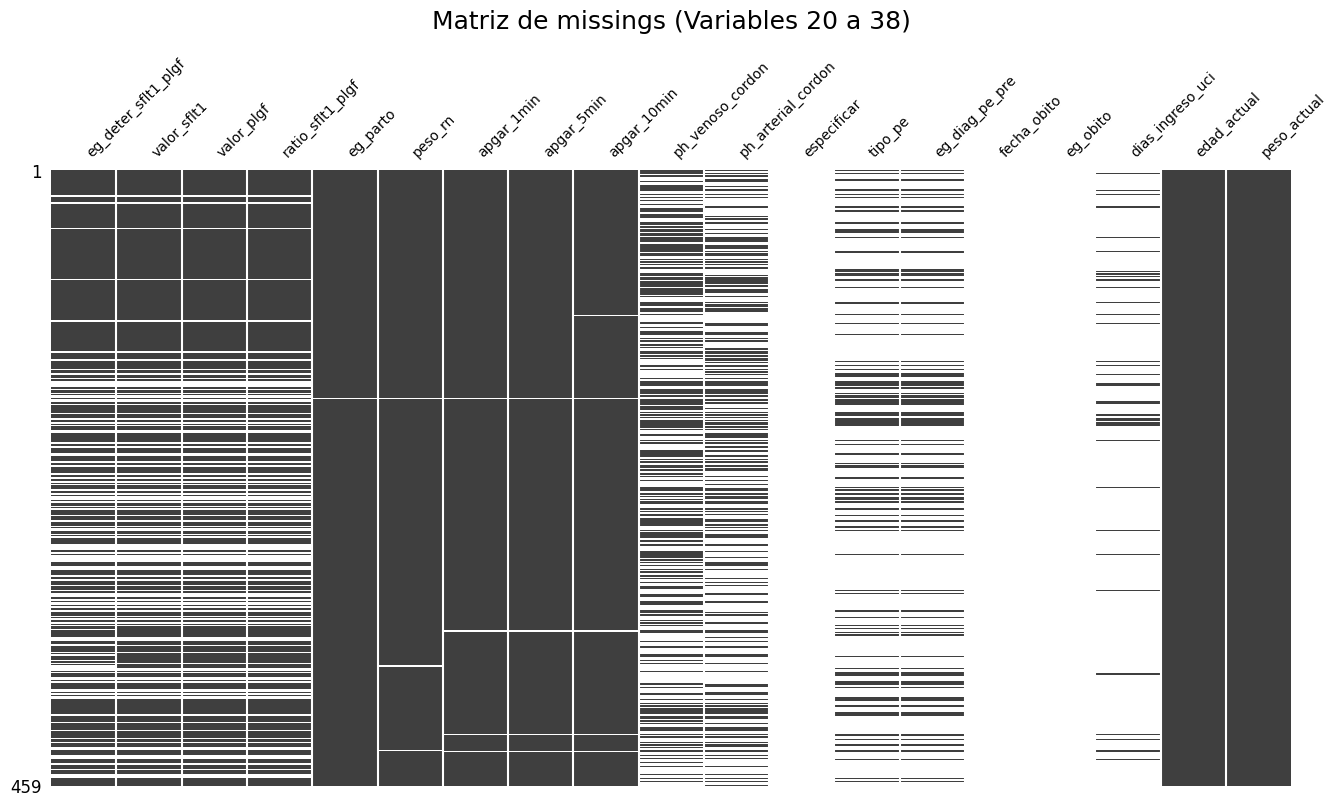

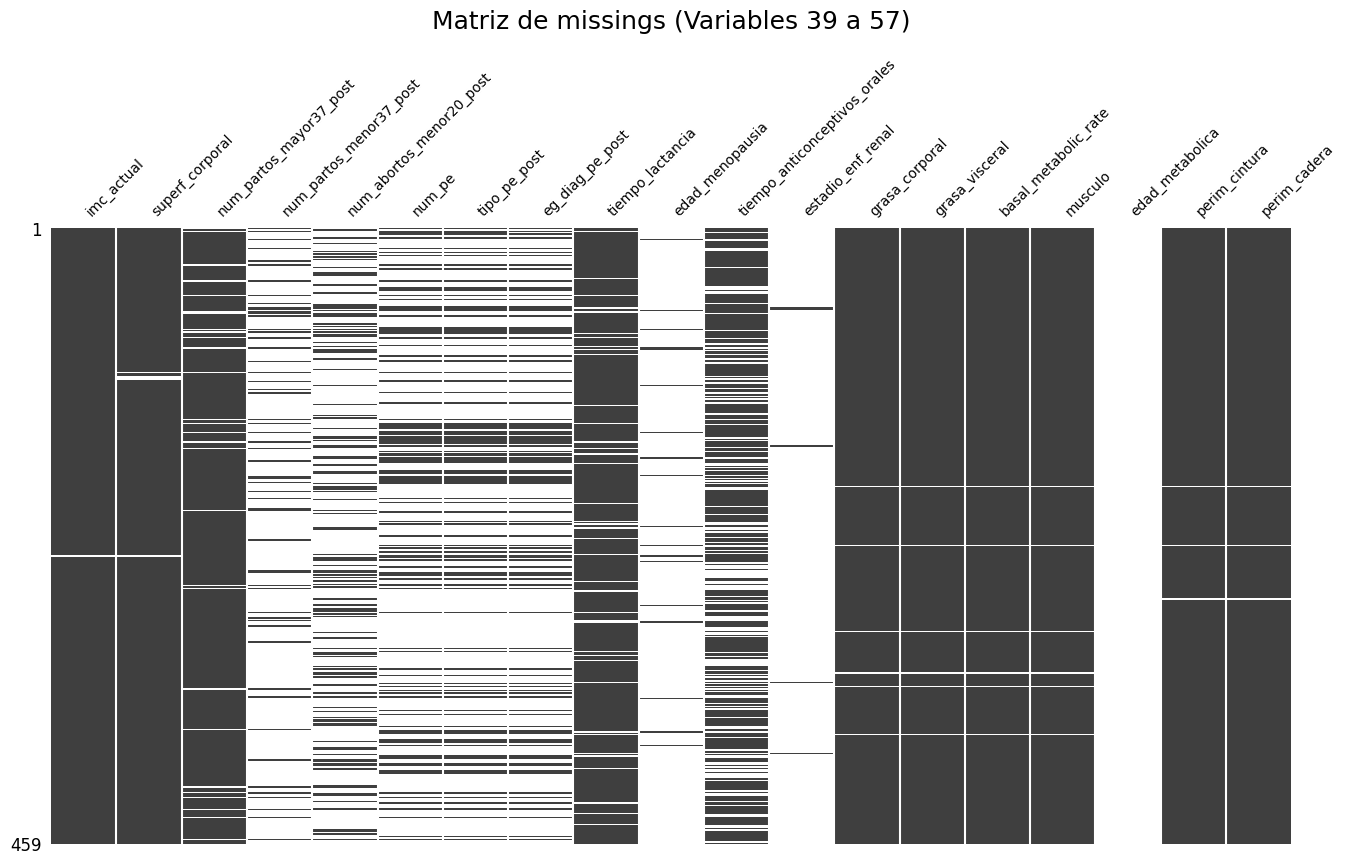

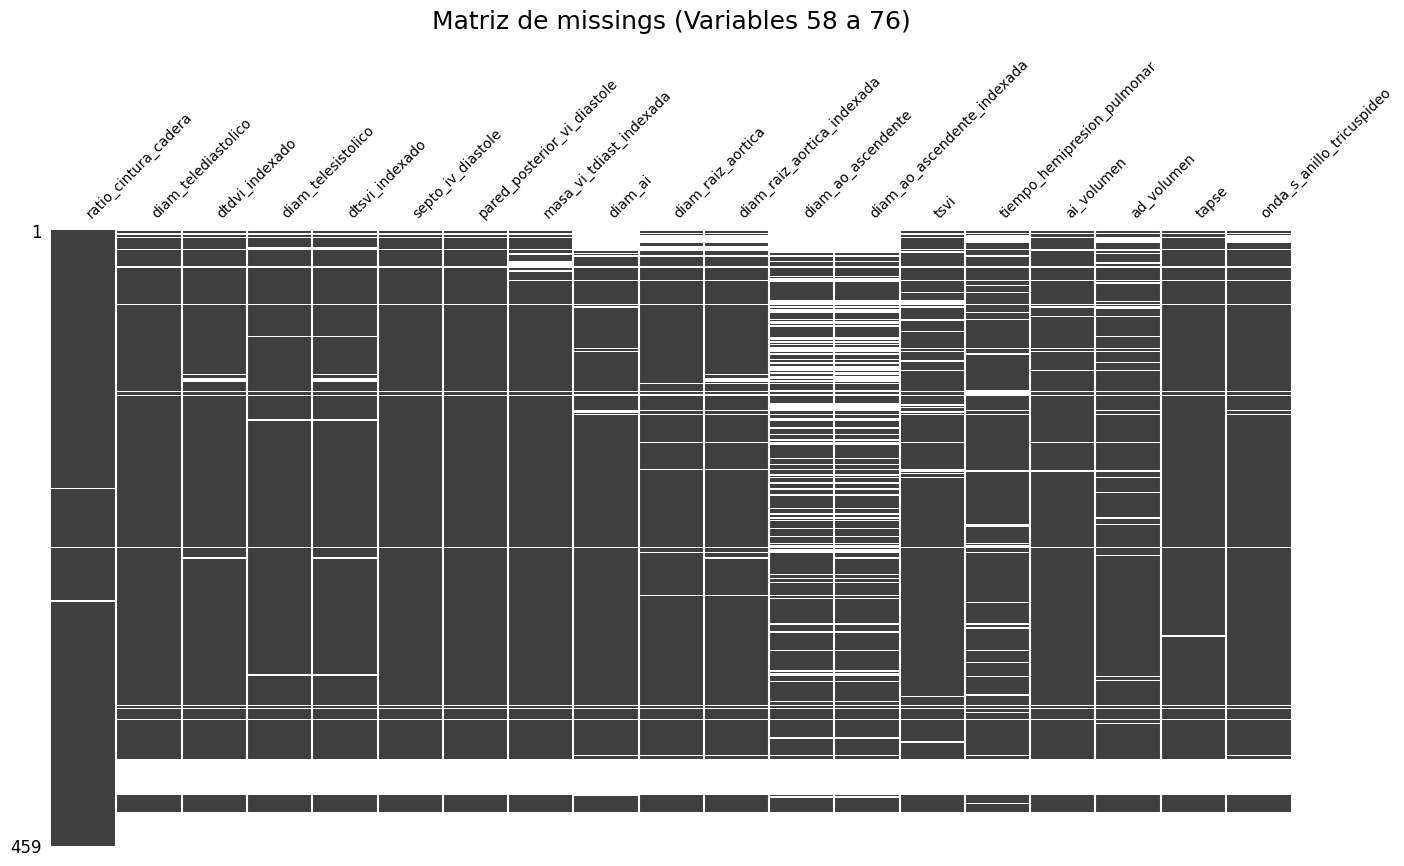

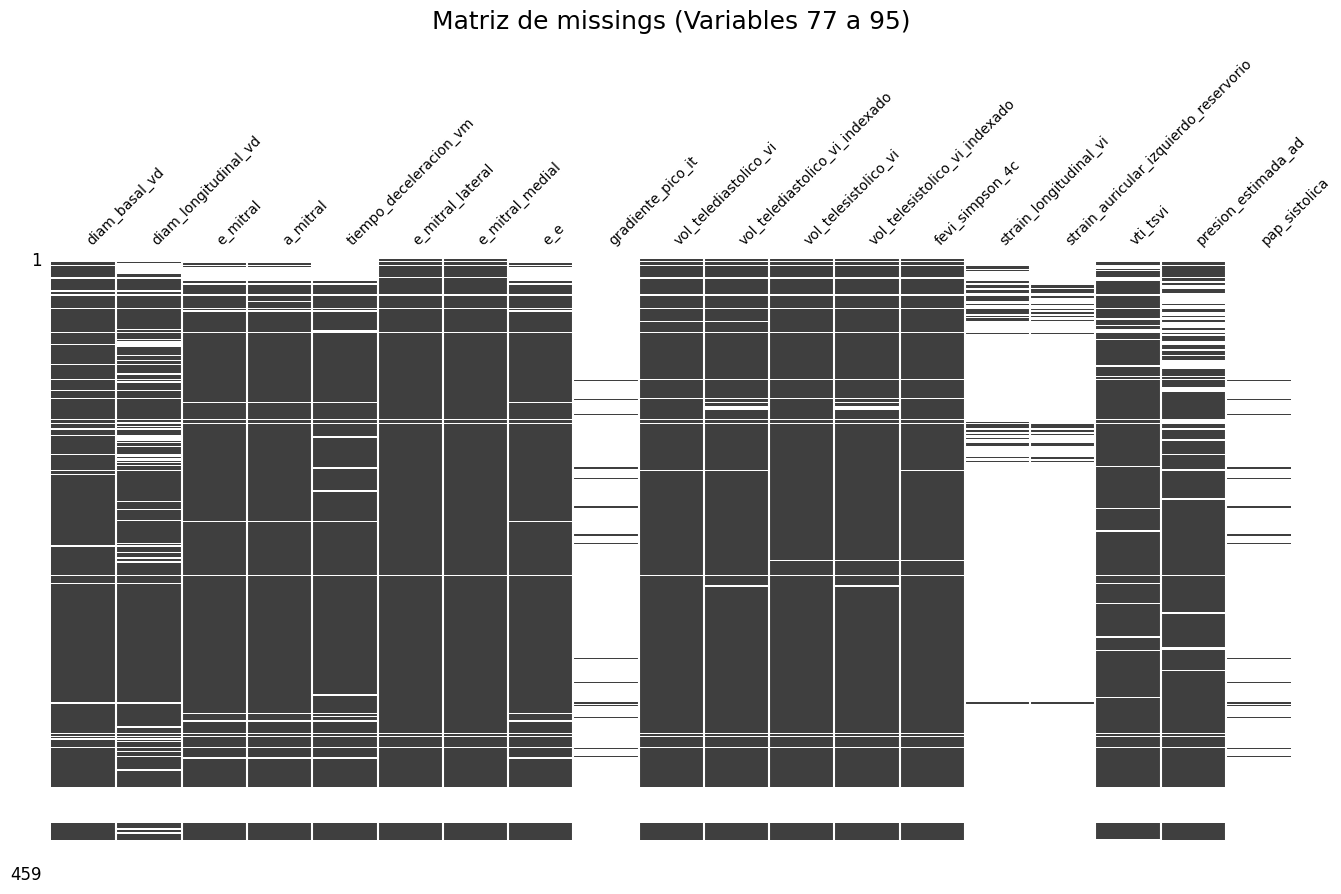

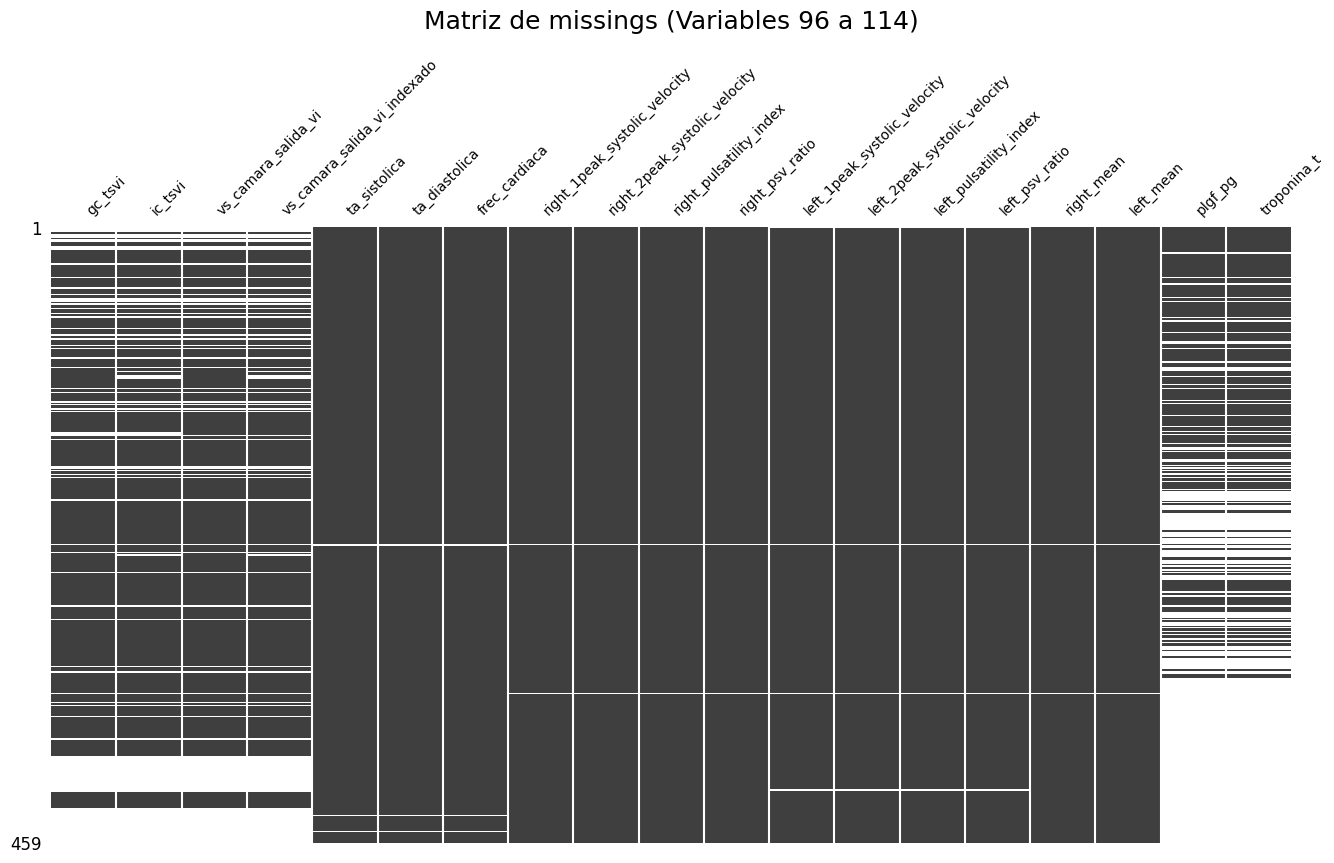

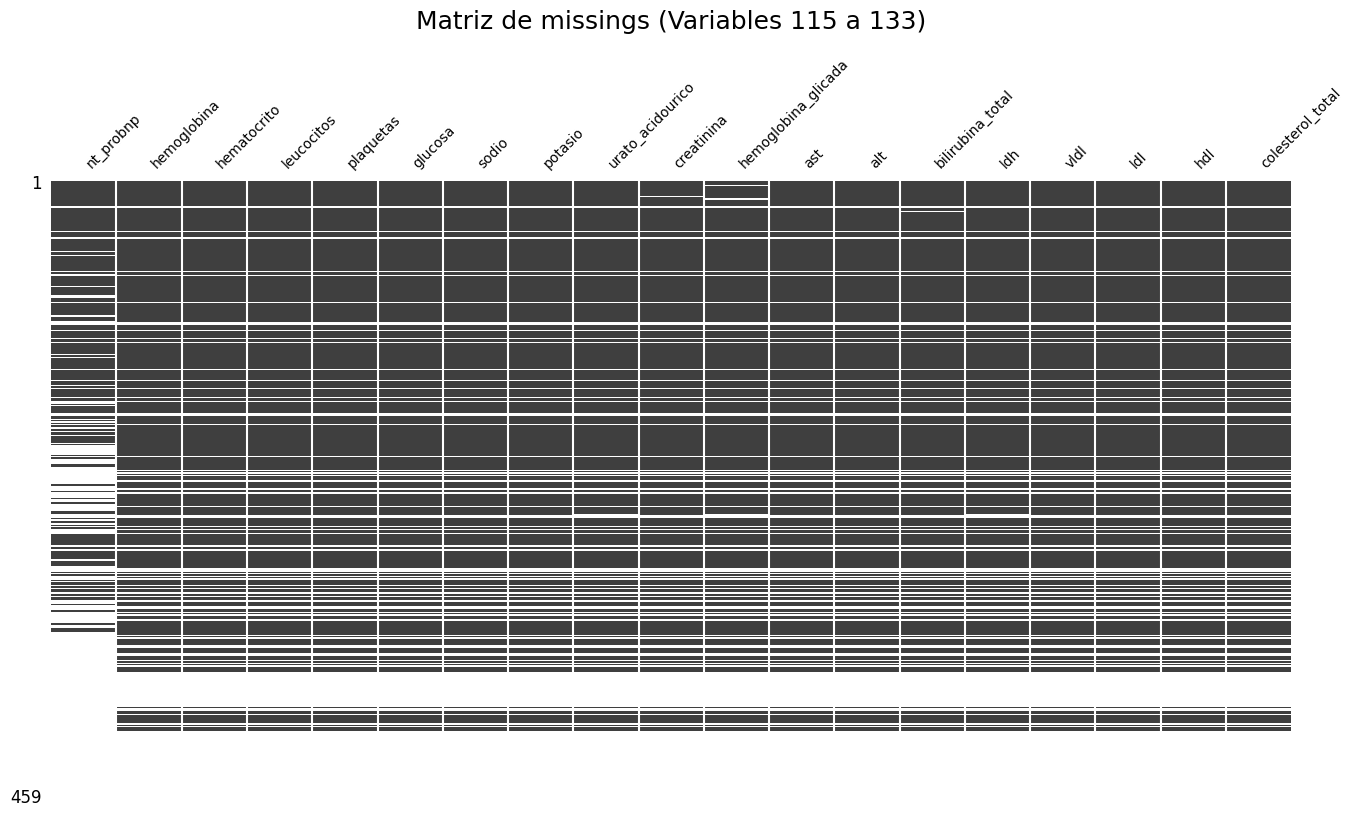

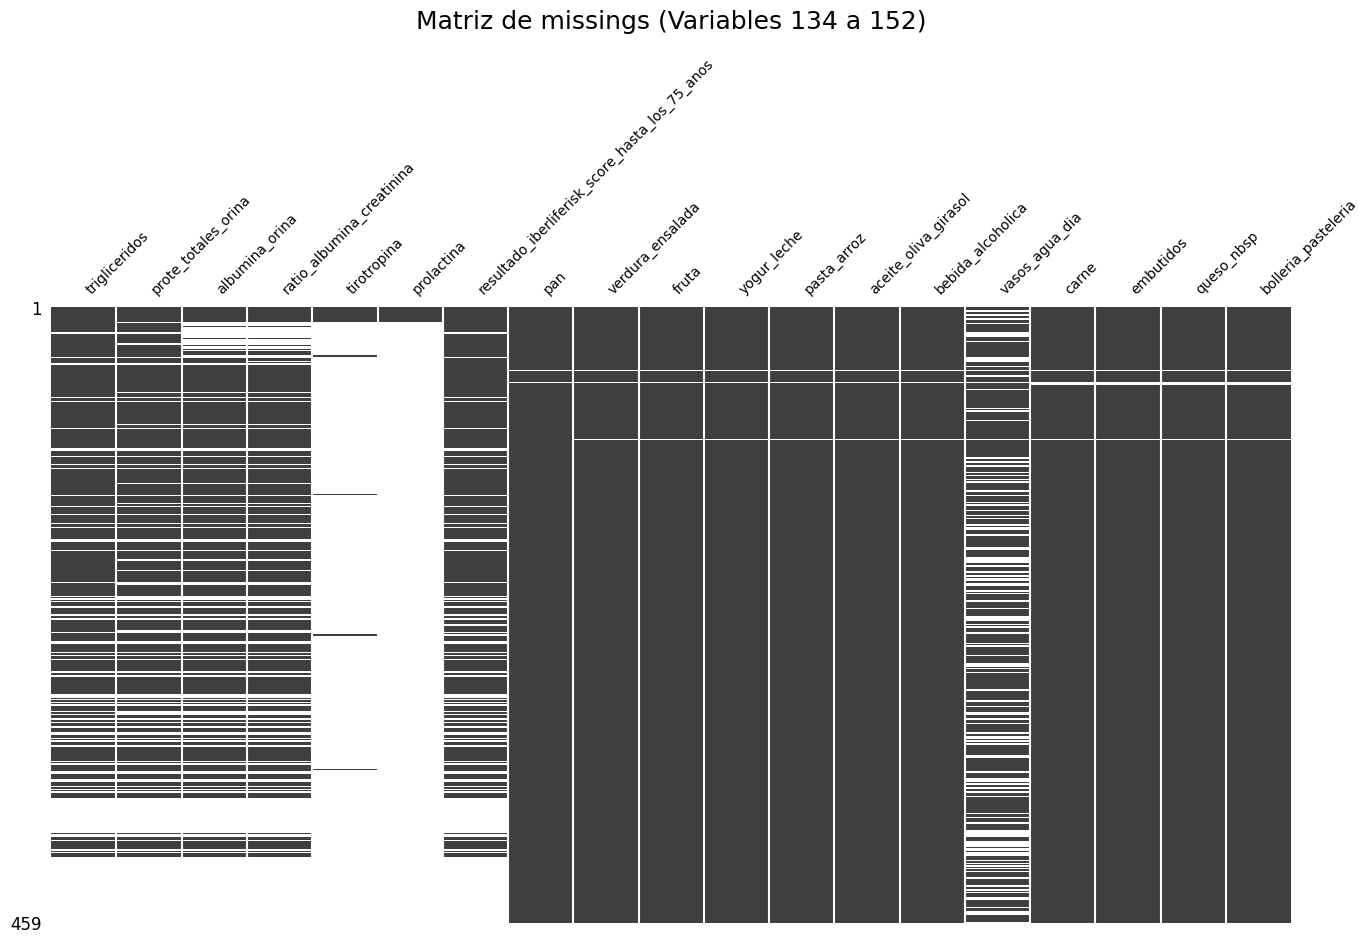

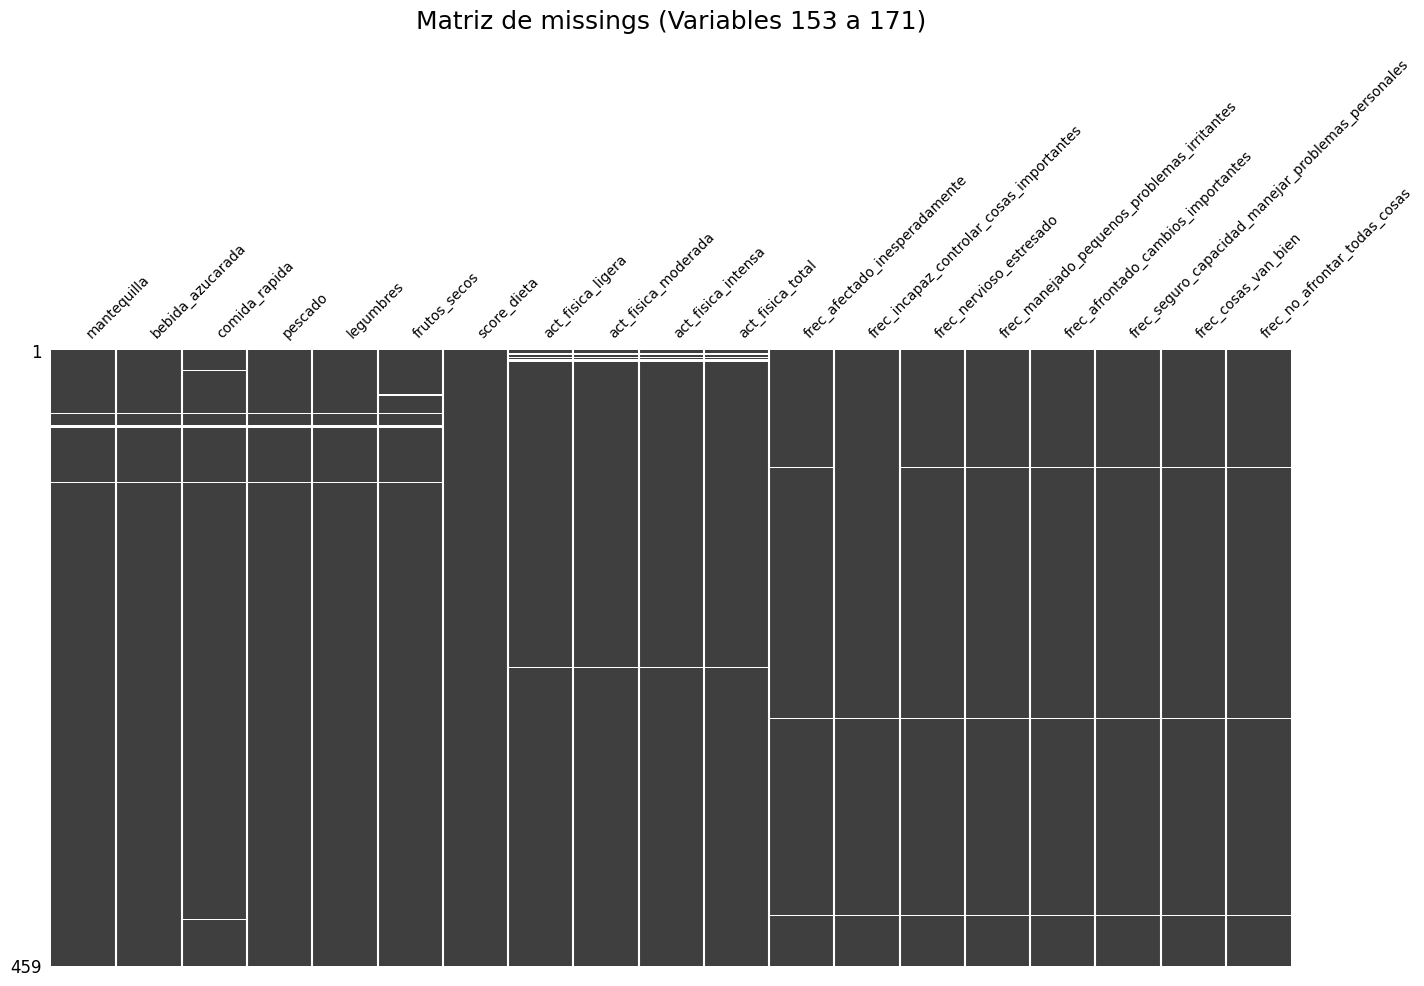

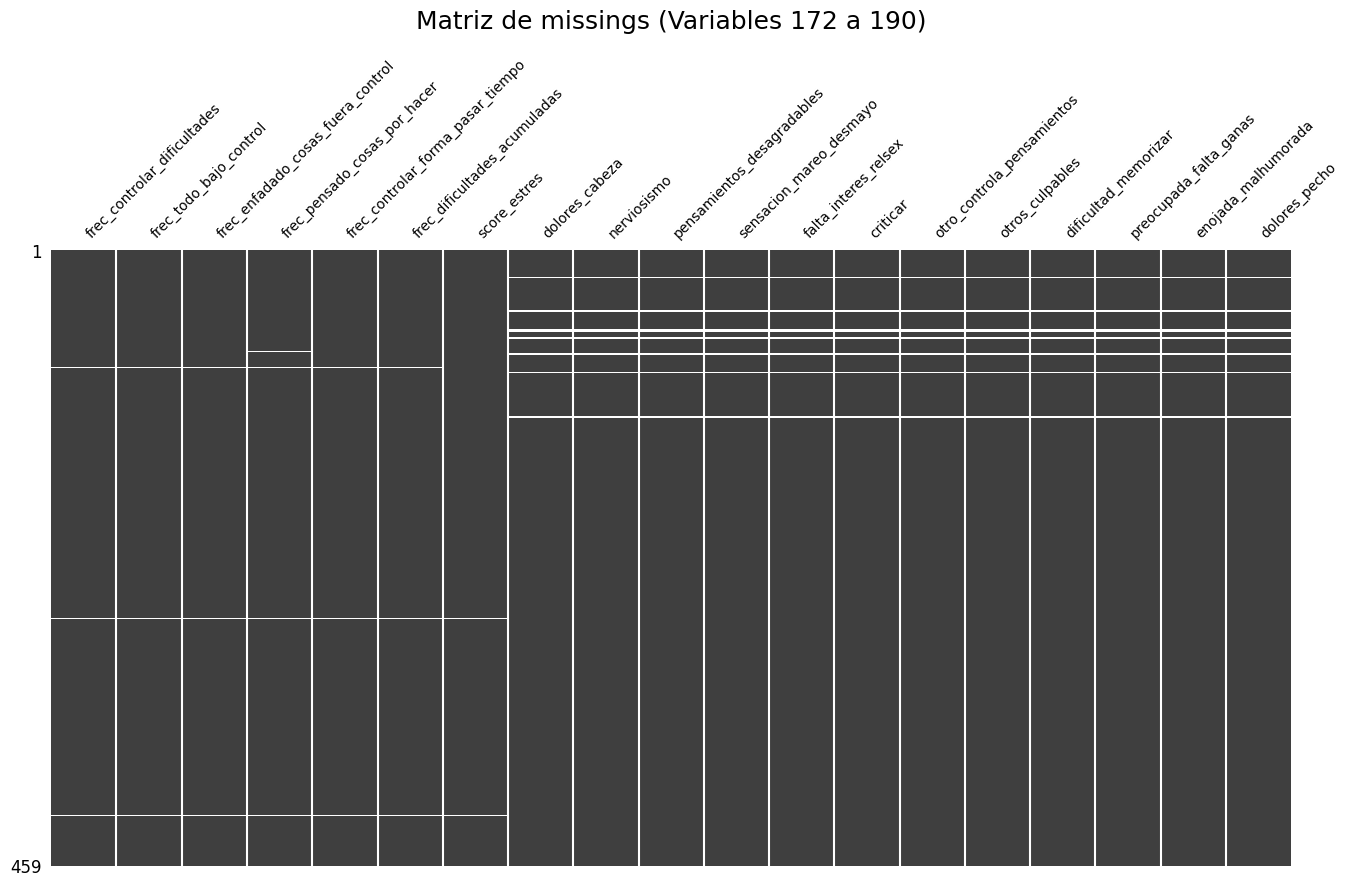

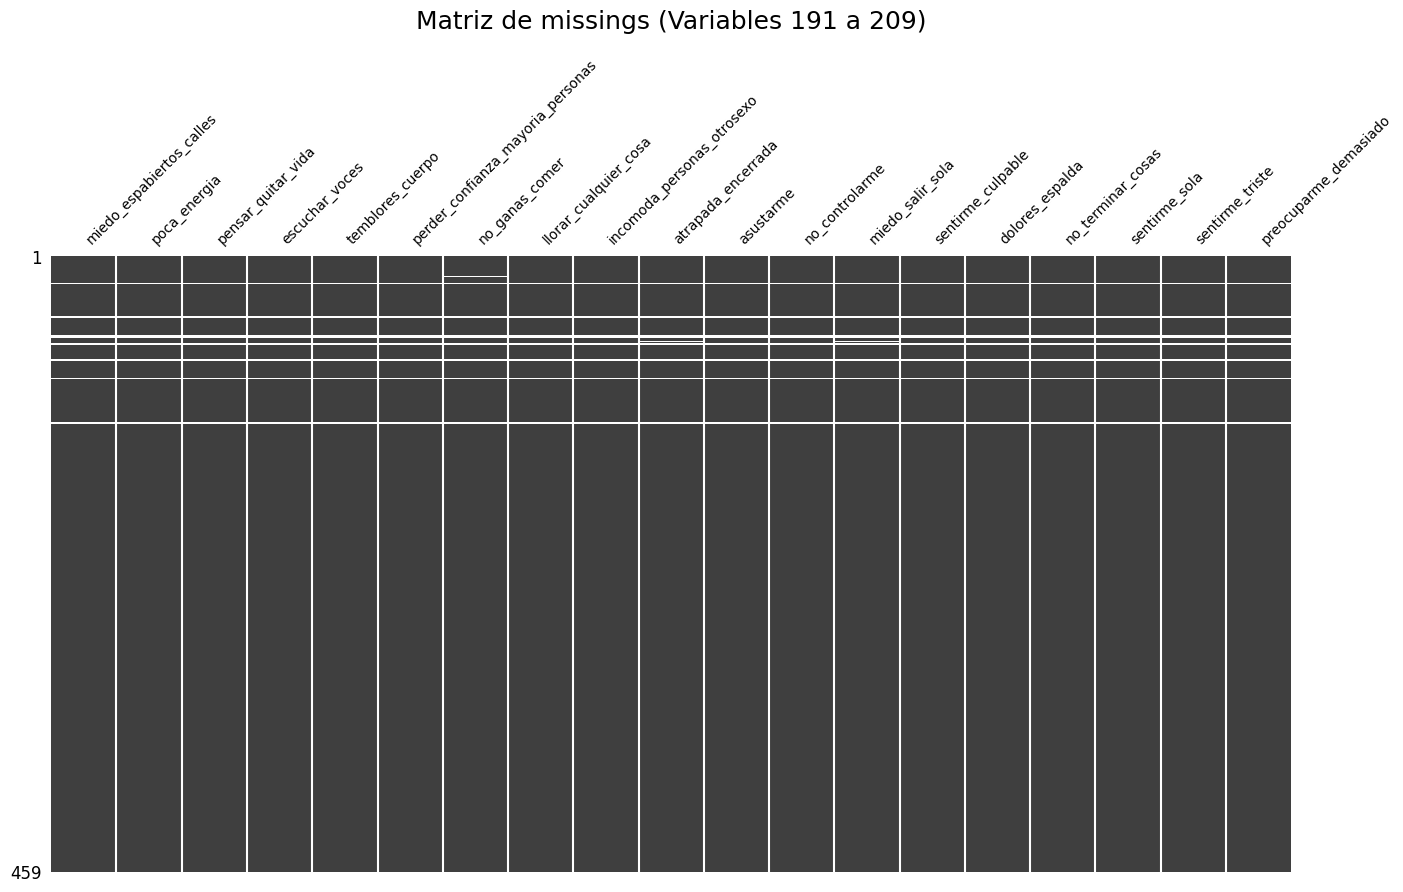

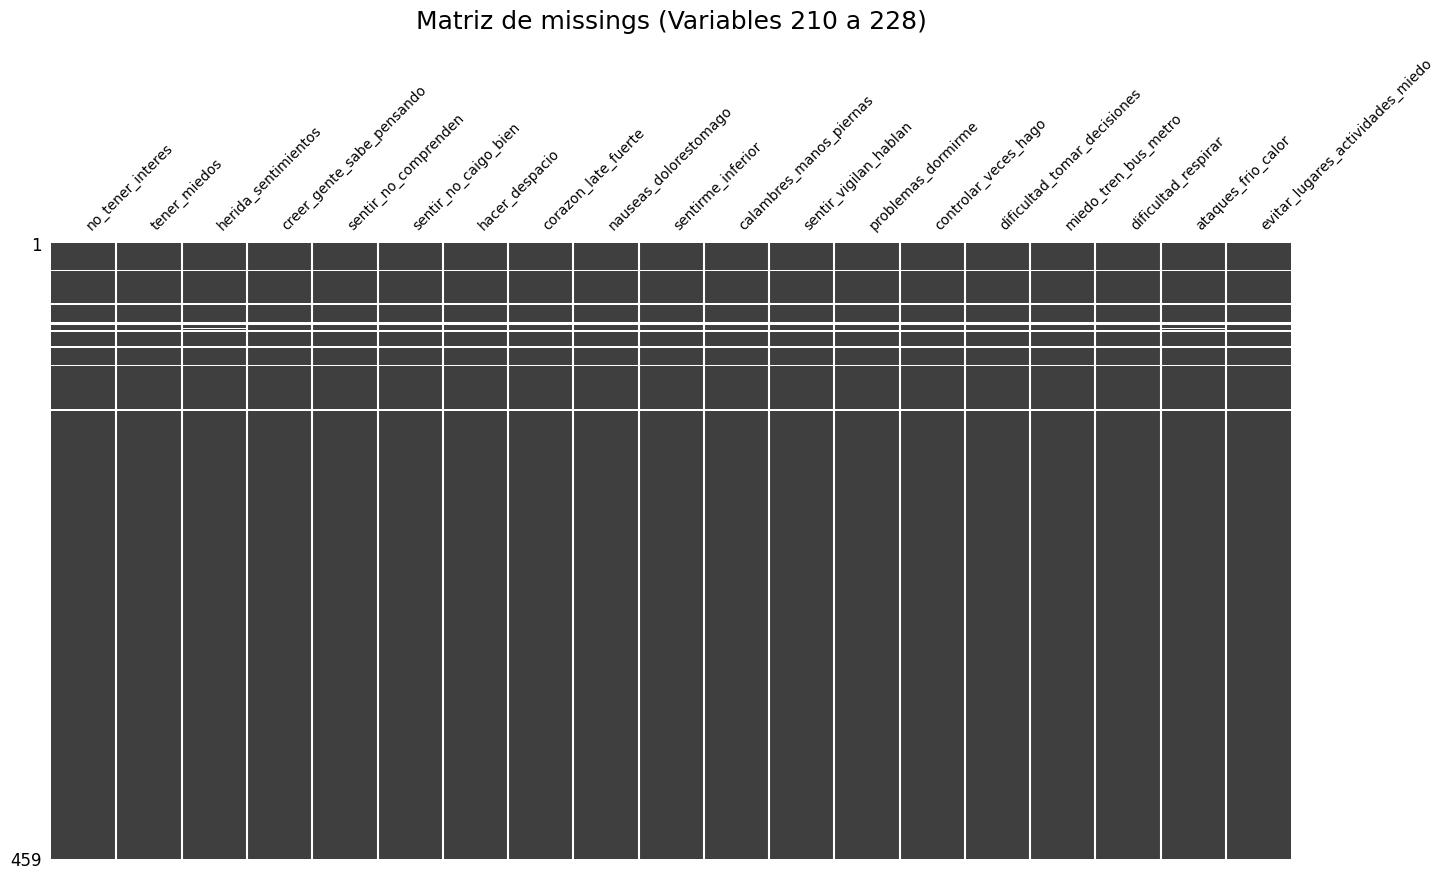

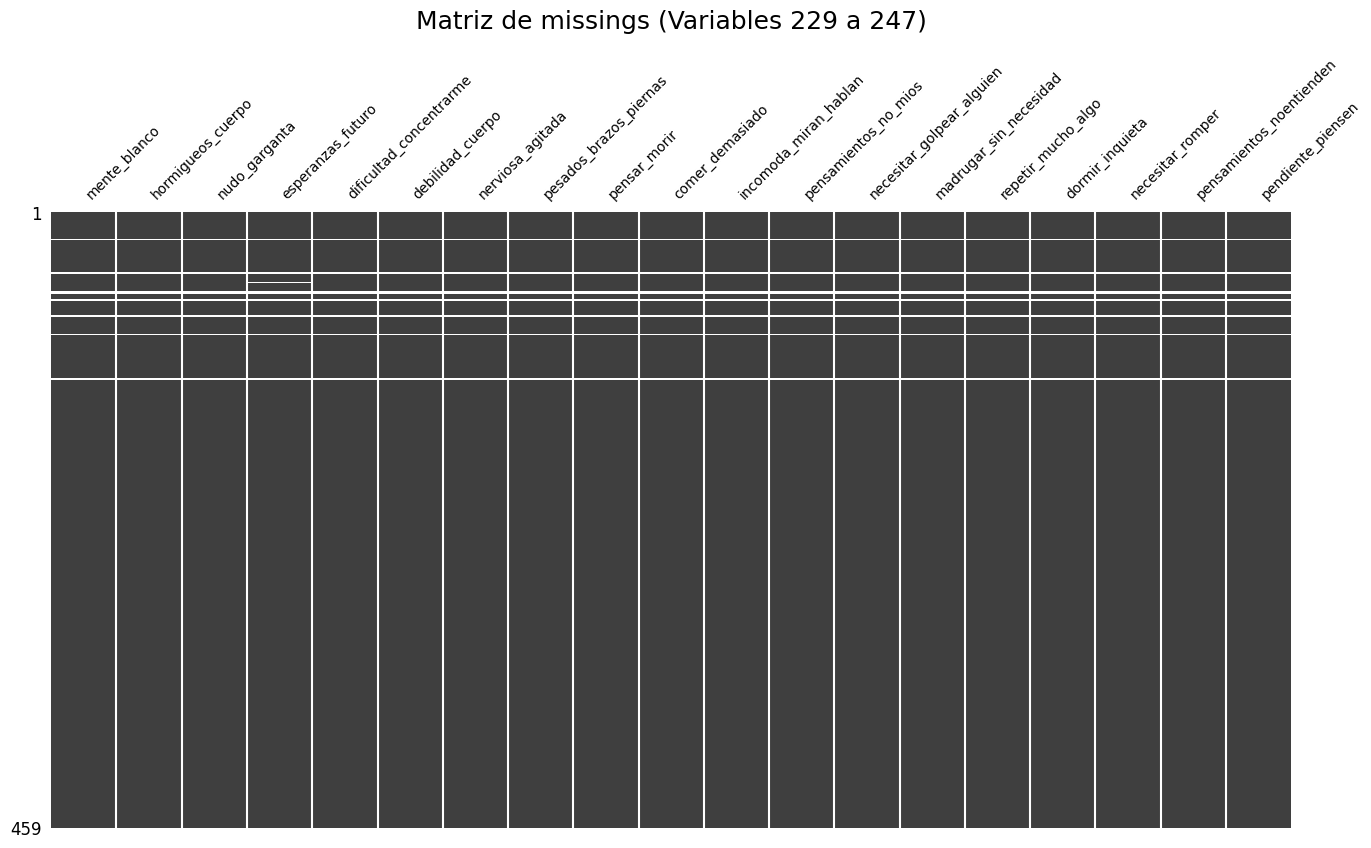

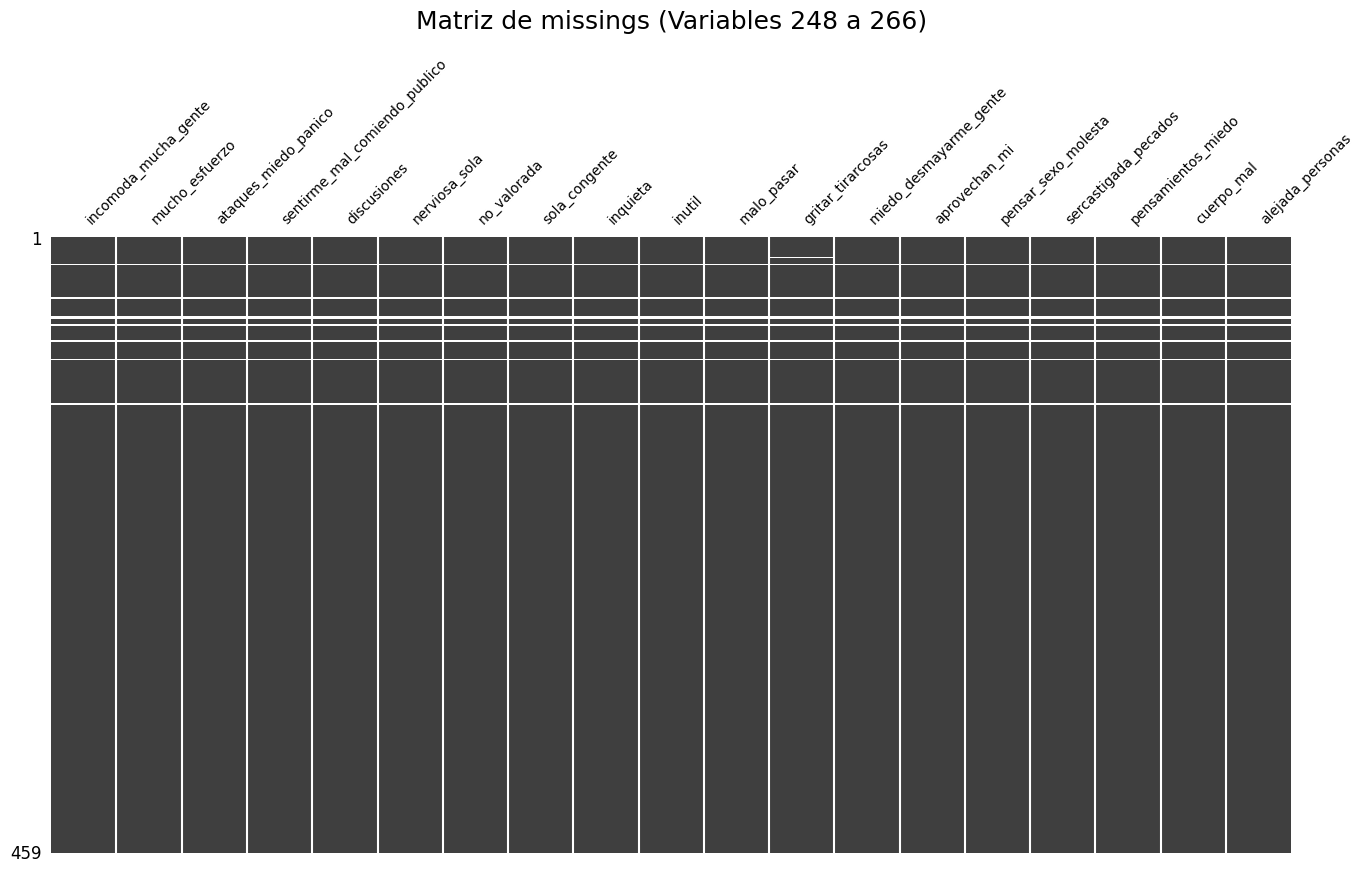

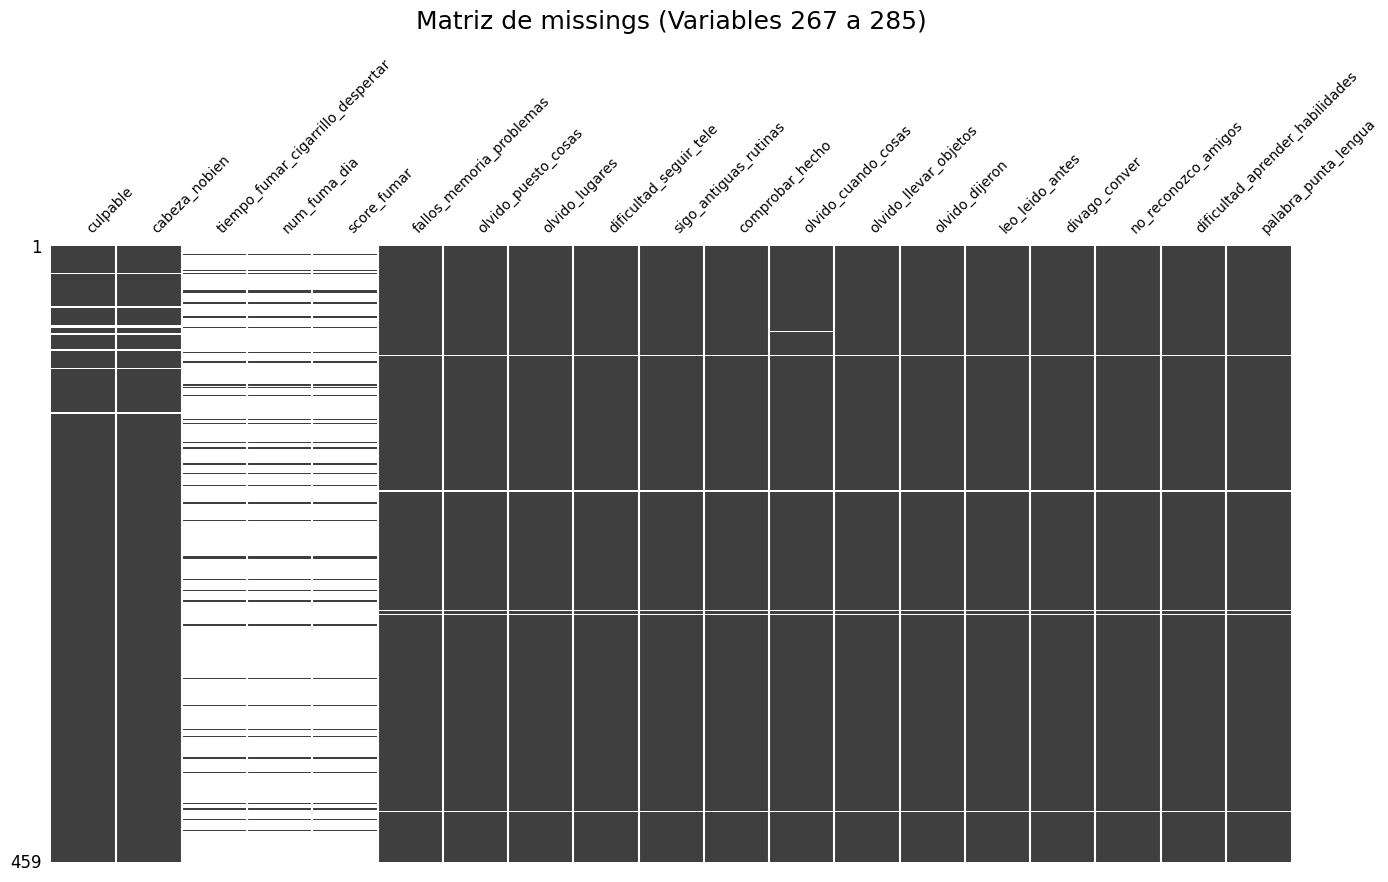

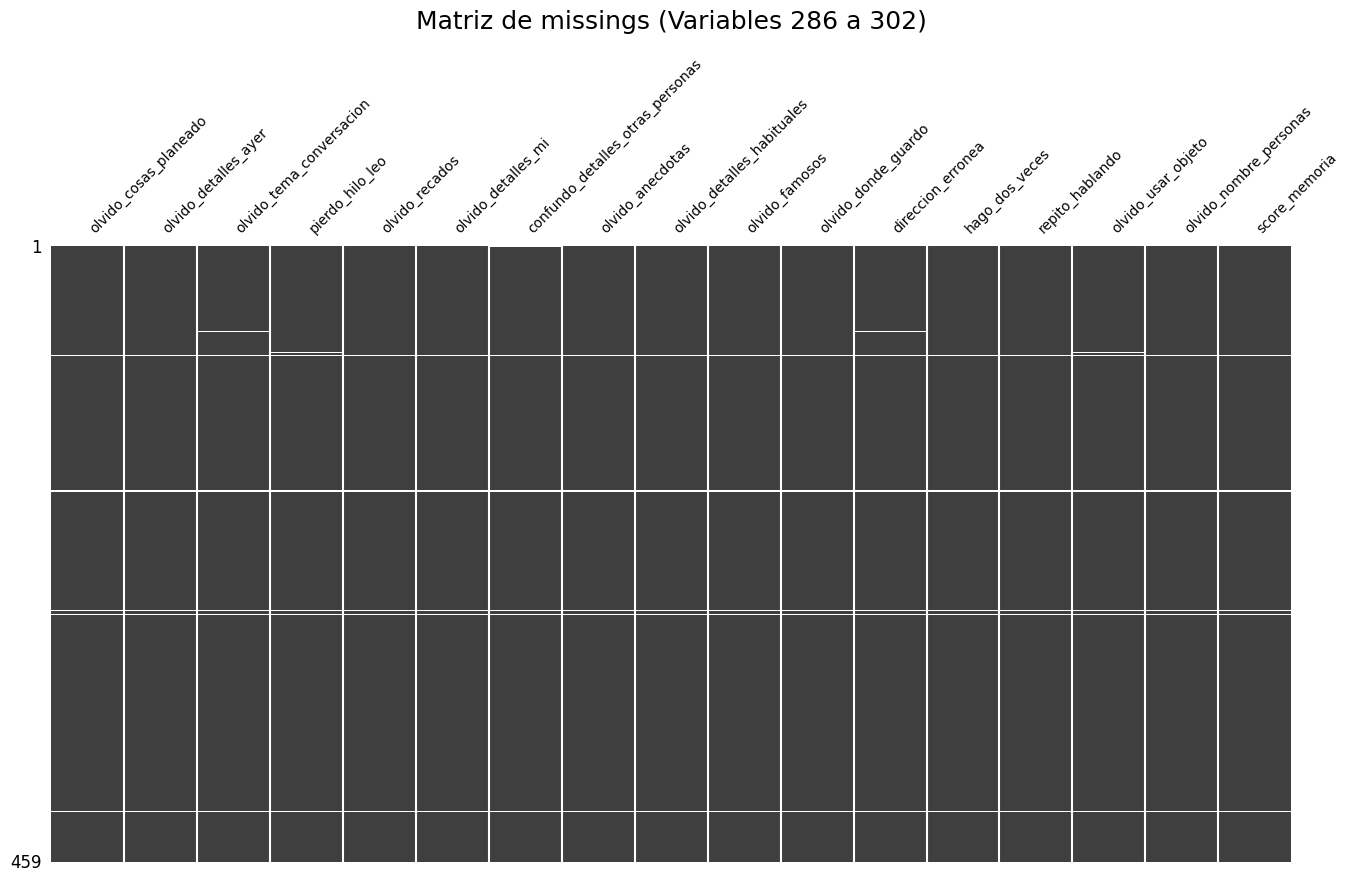

In [17]:
# Definimos las columnas y el tamaño del bloque
columnas = df_missing_num.columns.tolist()
tamano = 19 

# Bucle para generar una matriz por cada grupo de columnas
for i in range(0, len(columnas), tamano):
    # Seleccionamos el subconjunto de columnas
    cols_chunk = columnas[i : i + tamano]
    
    # Creamos la matriz para este bloque
    # 'sparkline=False' para ocultar la línea de la derecha y ganar espacio
    msno.matrix(df_missing_num[cols_chunk], figsize=(16, 8), fontsize=10, sparkline = False)
    
    # Añadimos el título indicando qué variables estamos viendo
    plt.title(f"Matriz de missings (Variables {i+1} a {min(i+tamano, len(columnas))})", 
              fontsize=18, pad=20)
    
    plt.show()

#### Variables categóricas

In [18]:
# Seleccionamos solo las variables categóricas para el análisis de missings
df_missing_cat = df_cleaned.select_dtypes(include=['object', 'category'])
df_missing_cat.shape

(459, 115)

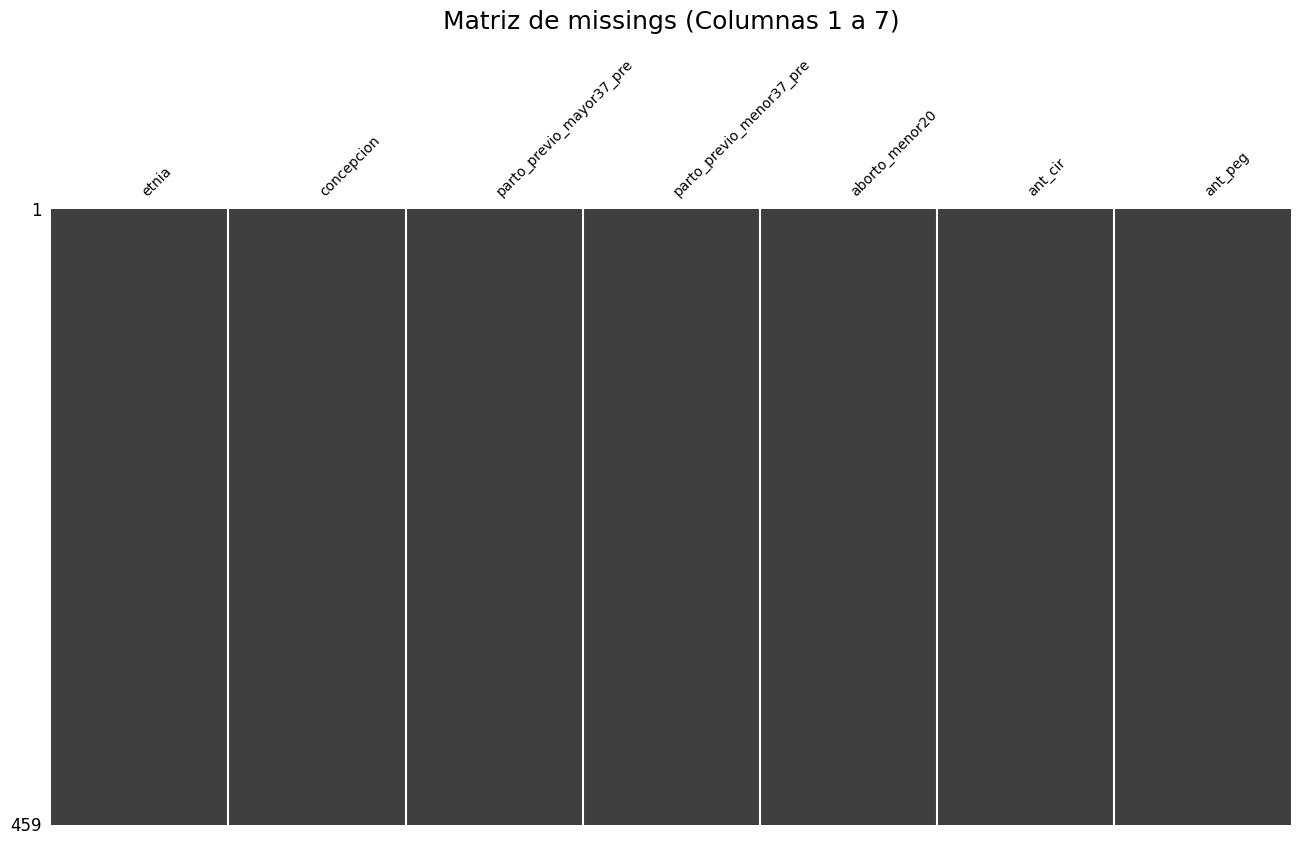

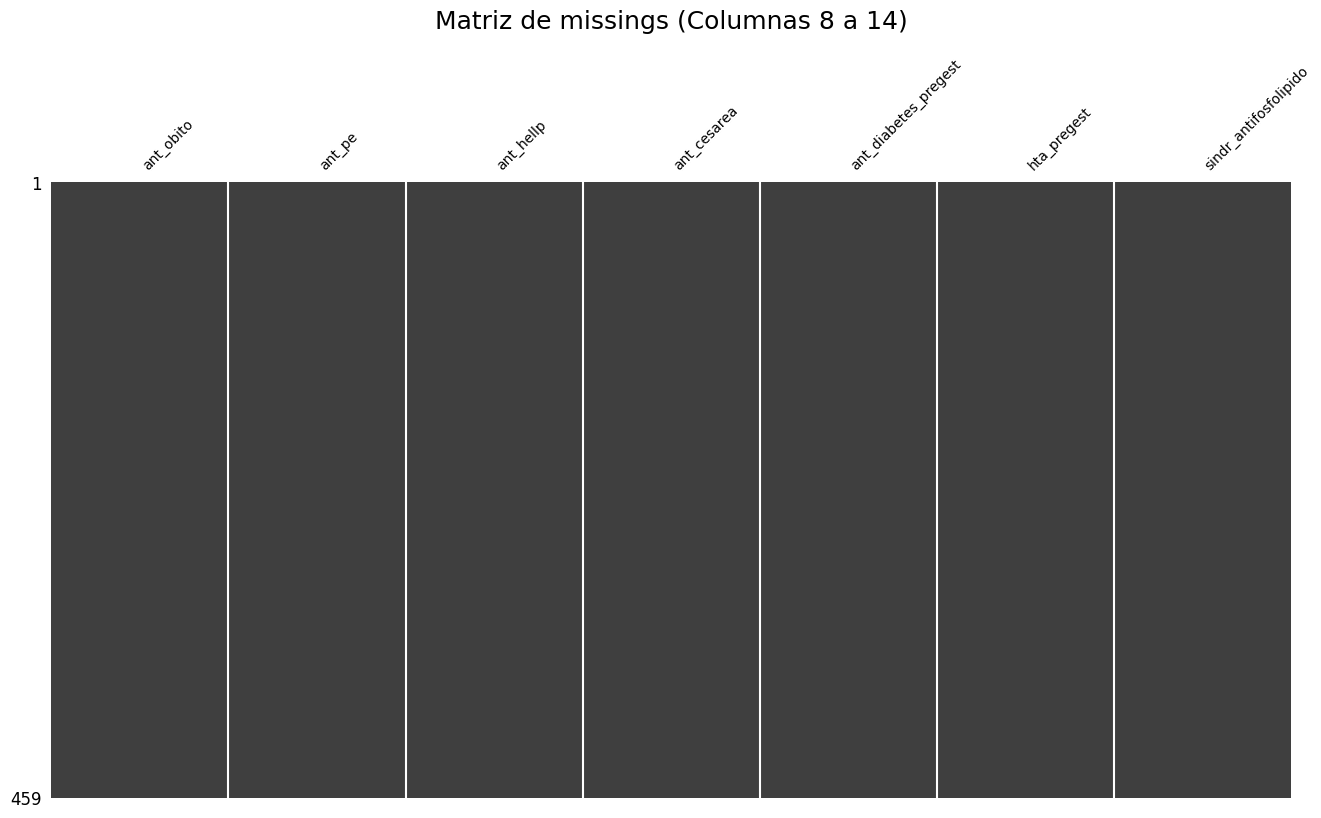

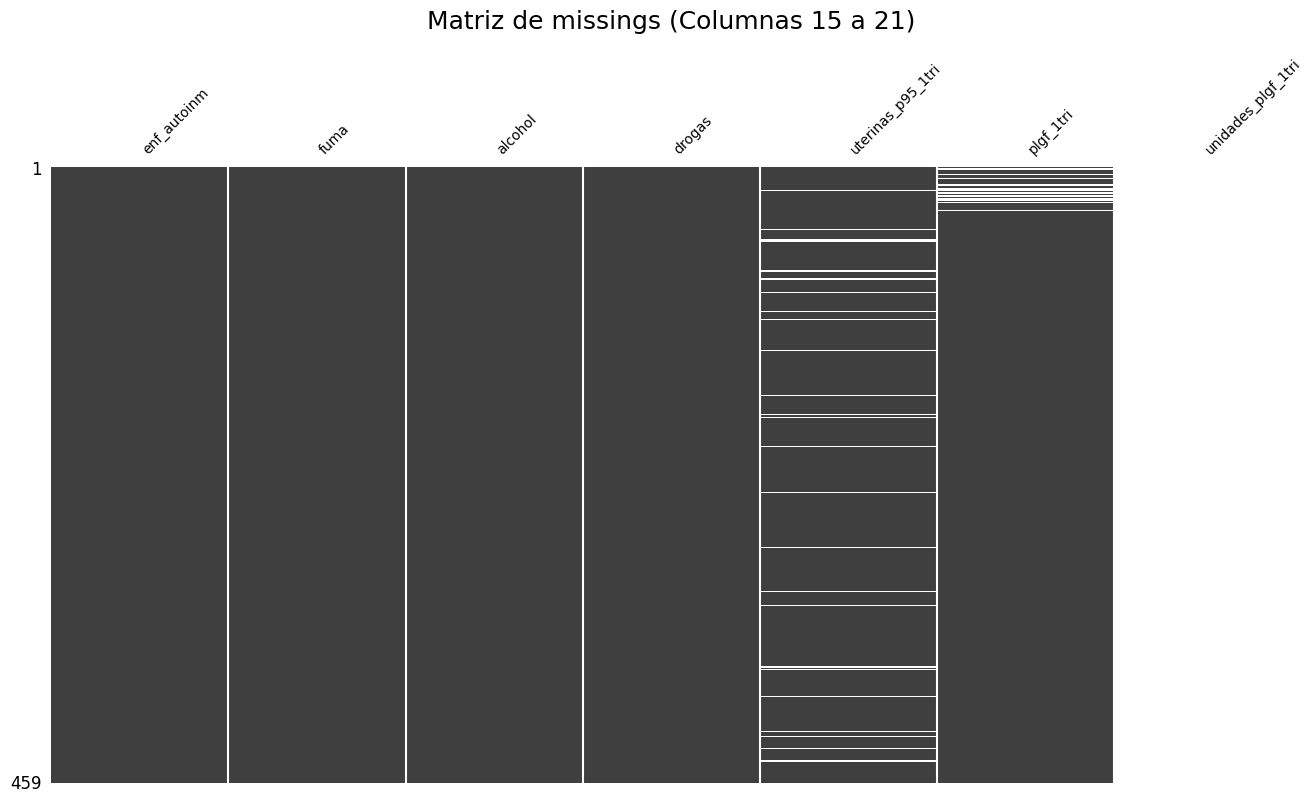

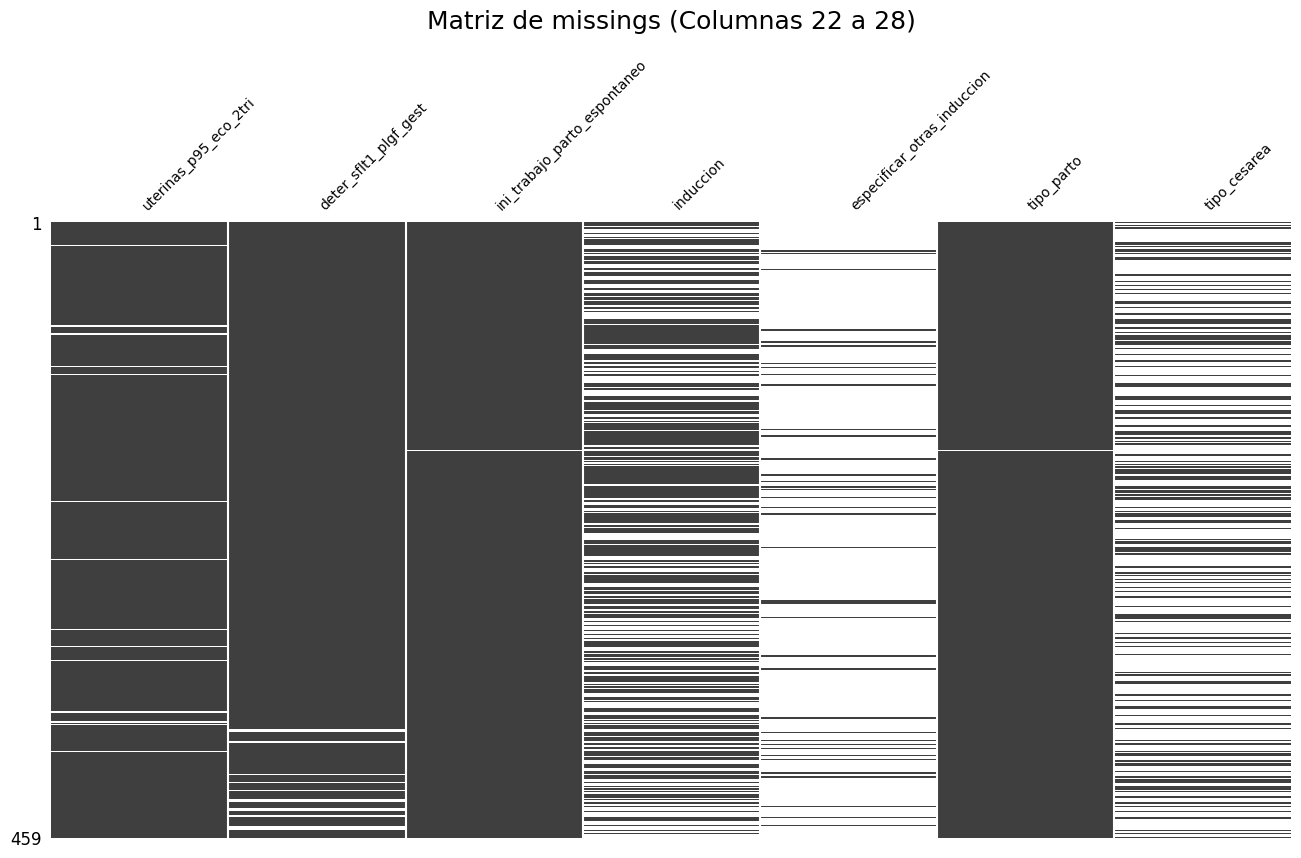

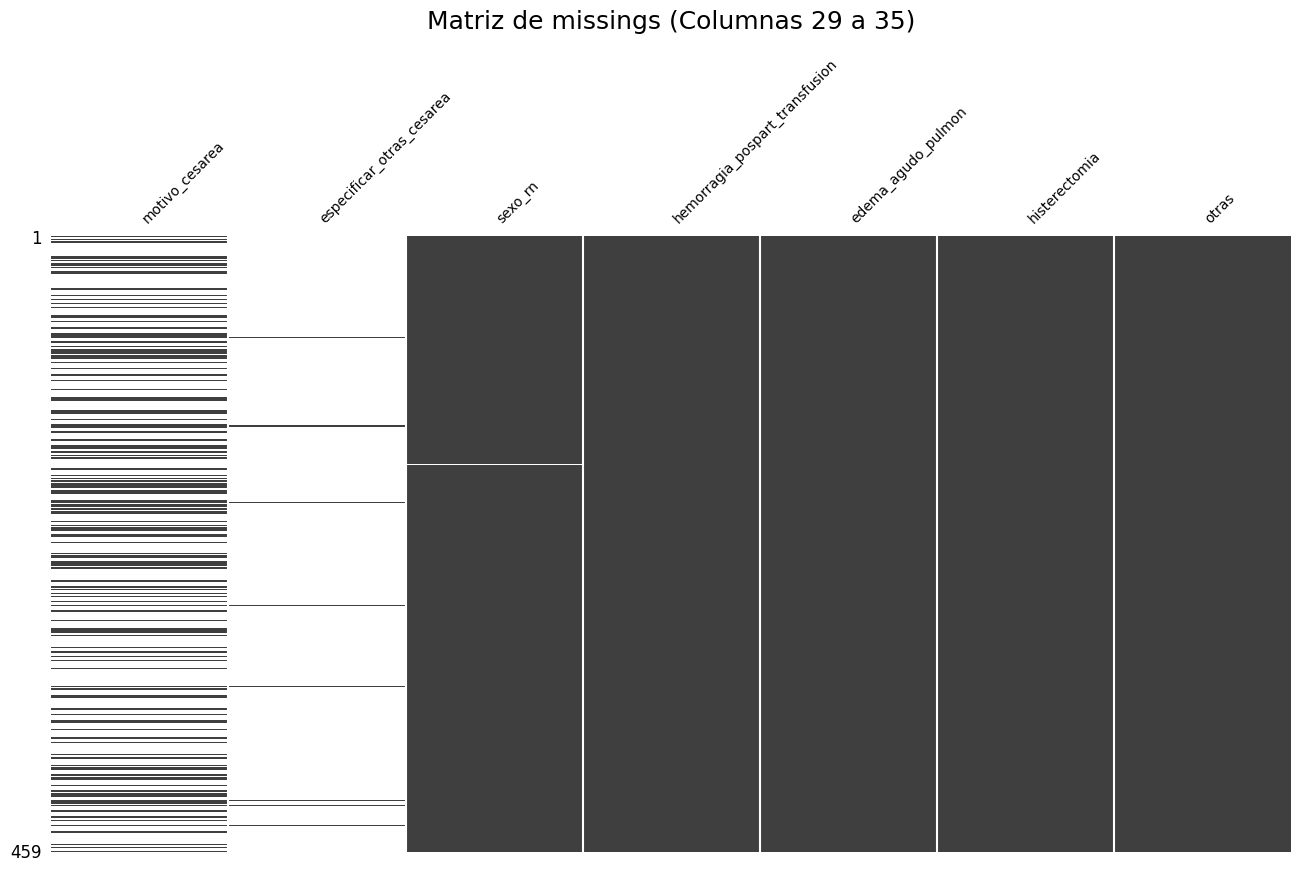

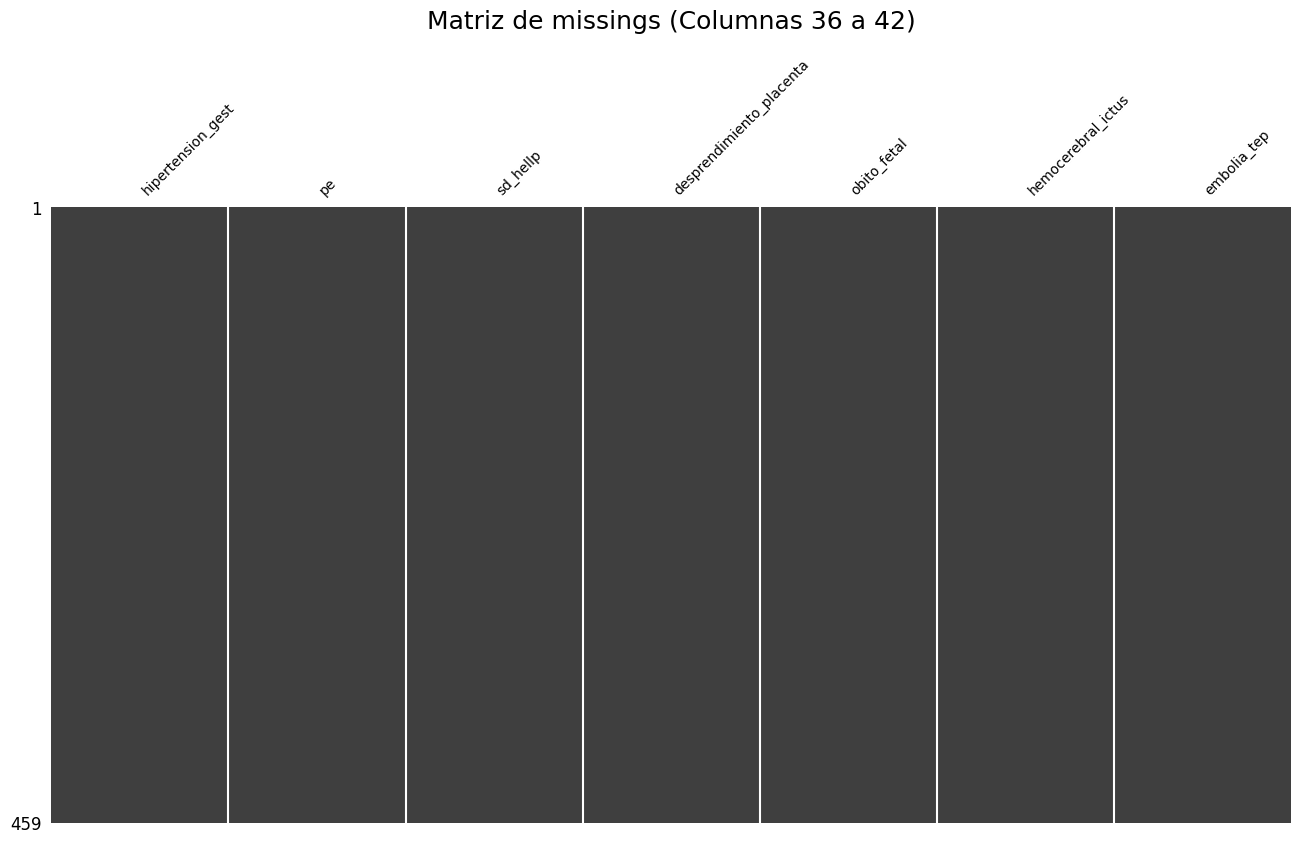

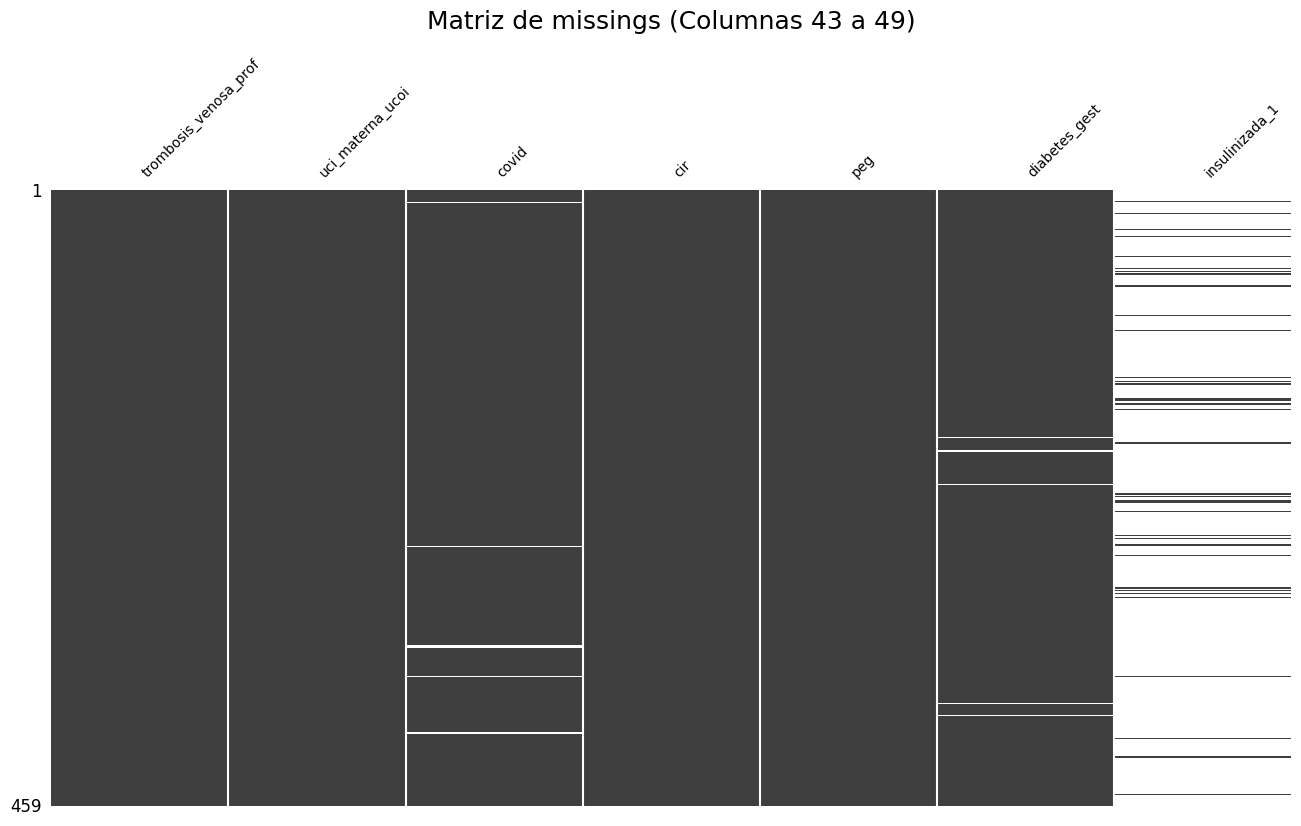

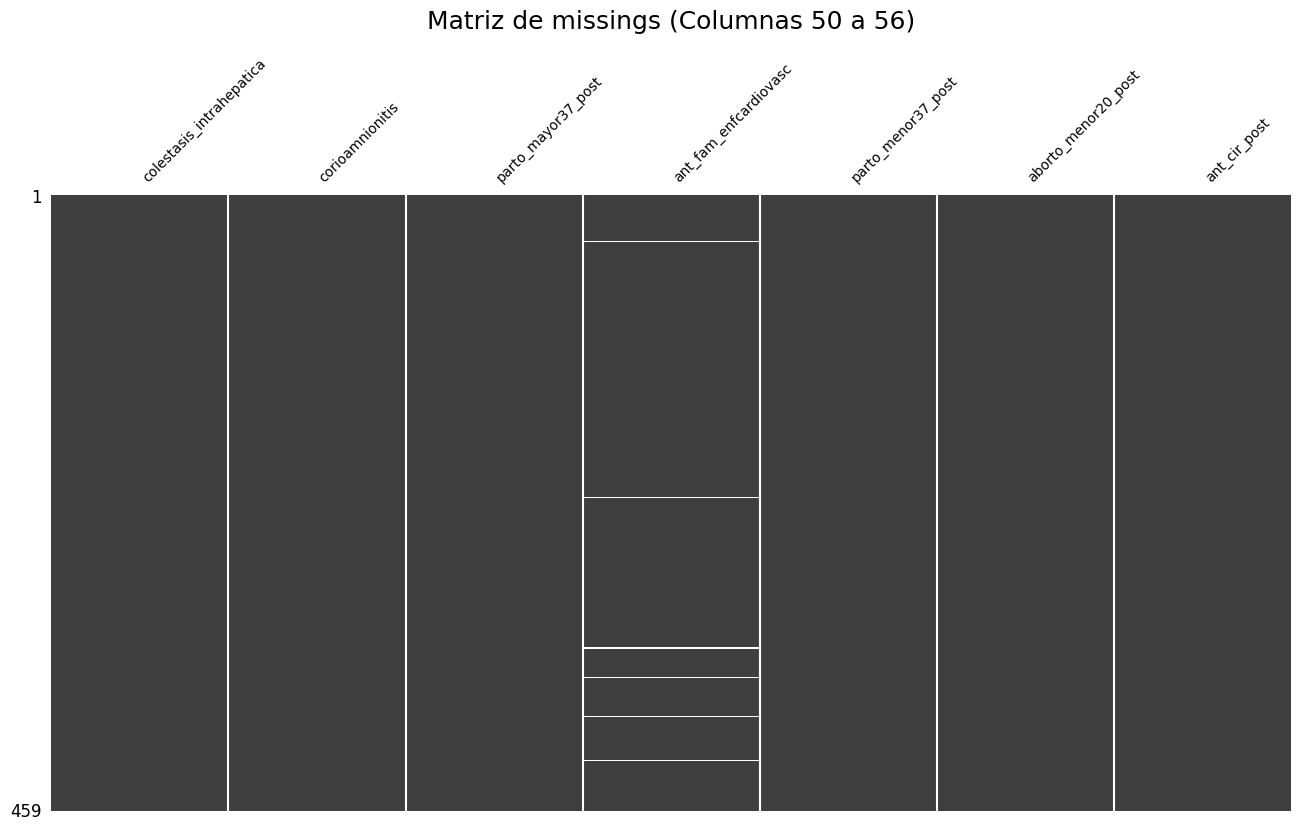

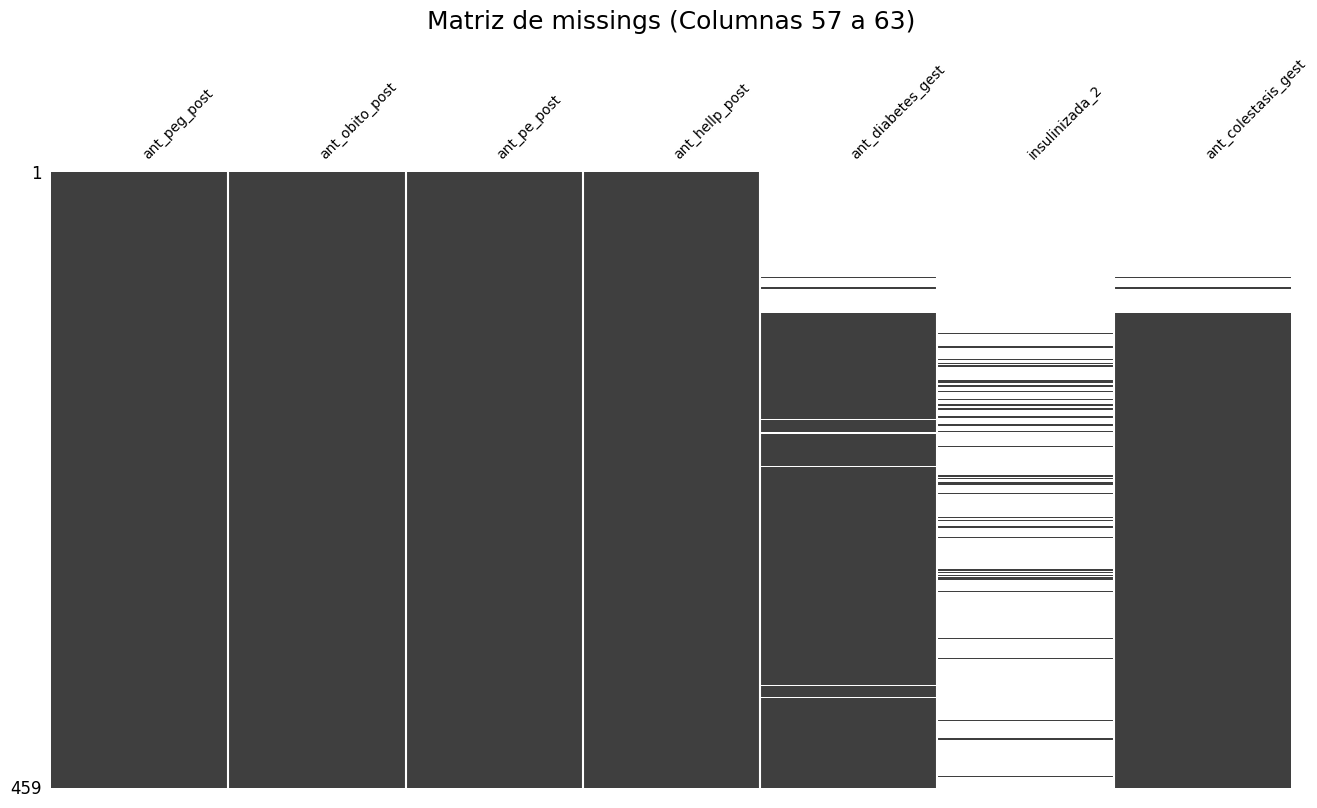

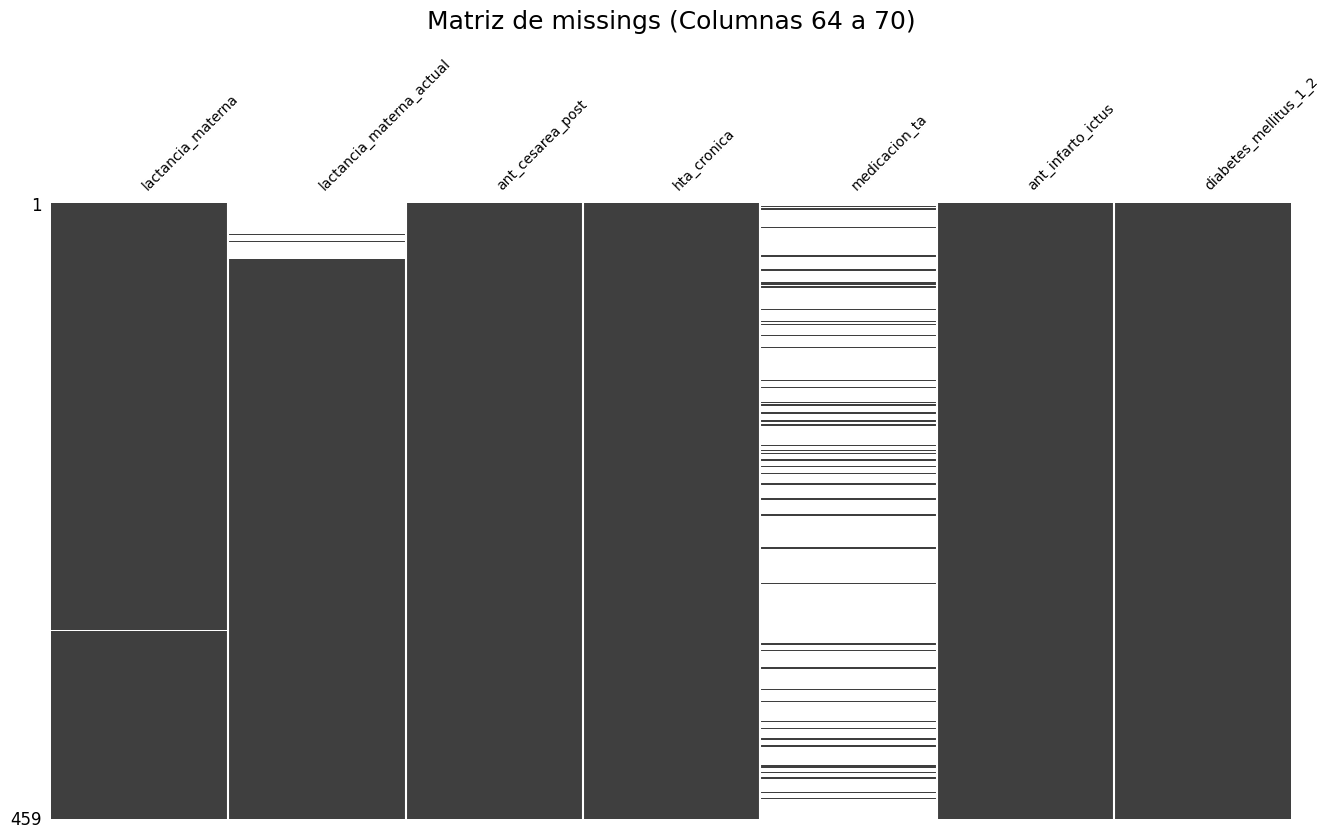

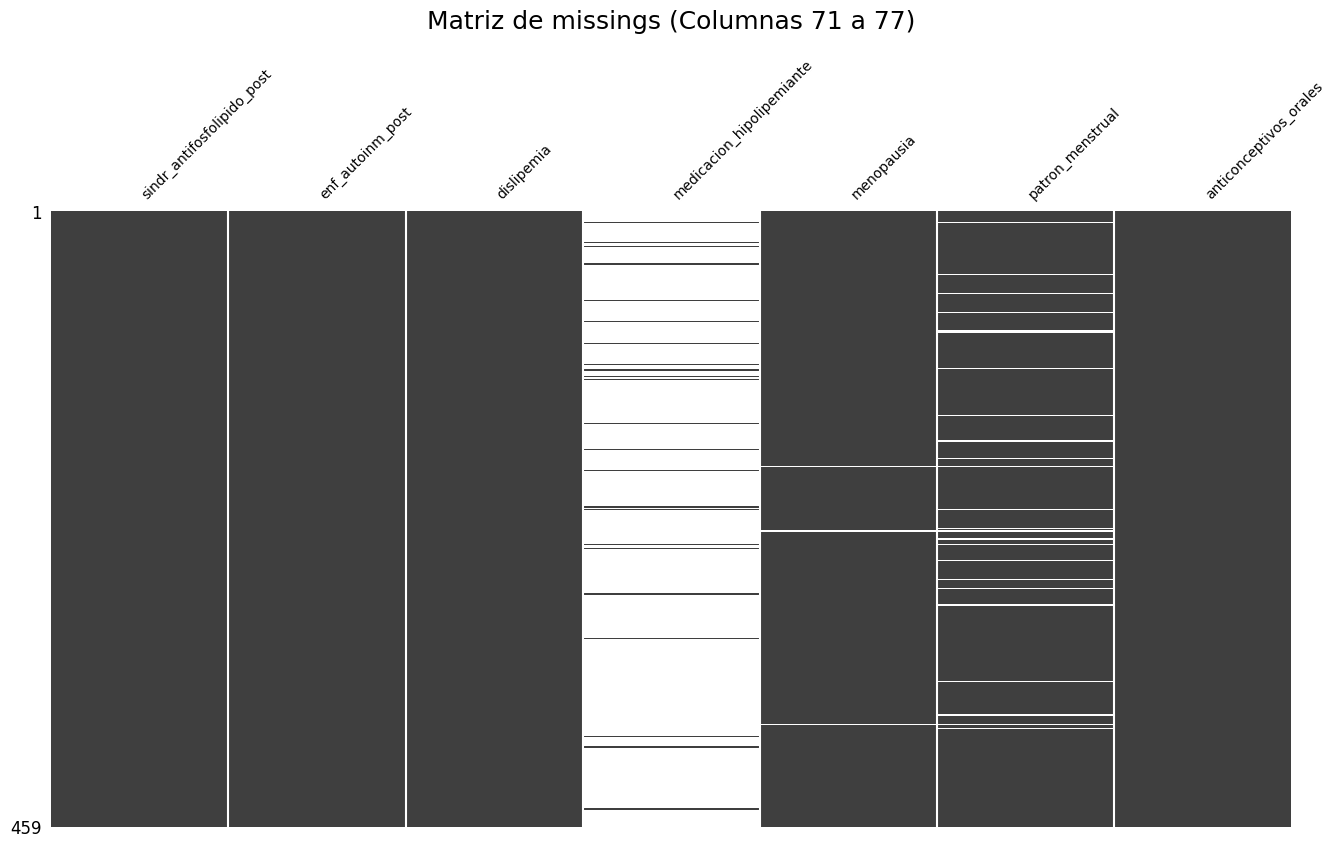

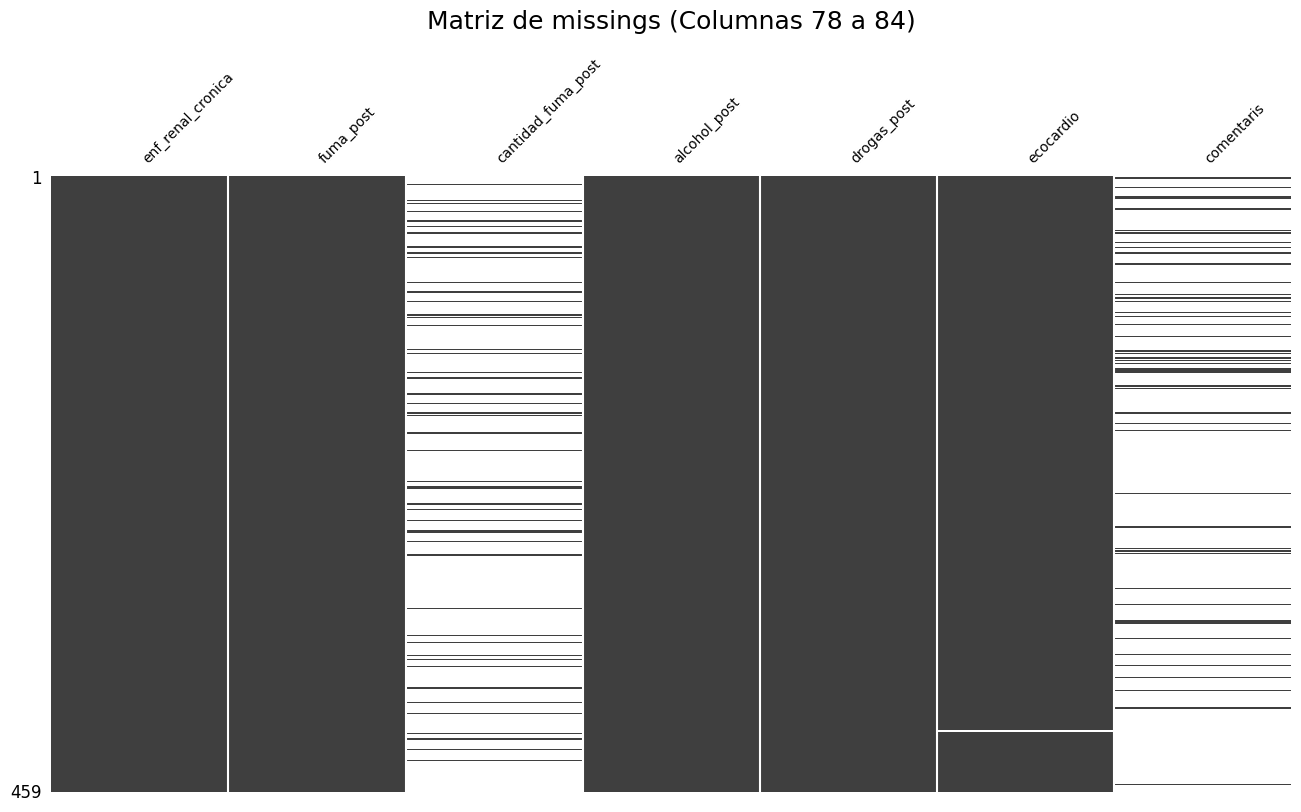

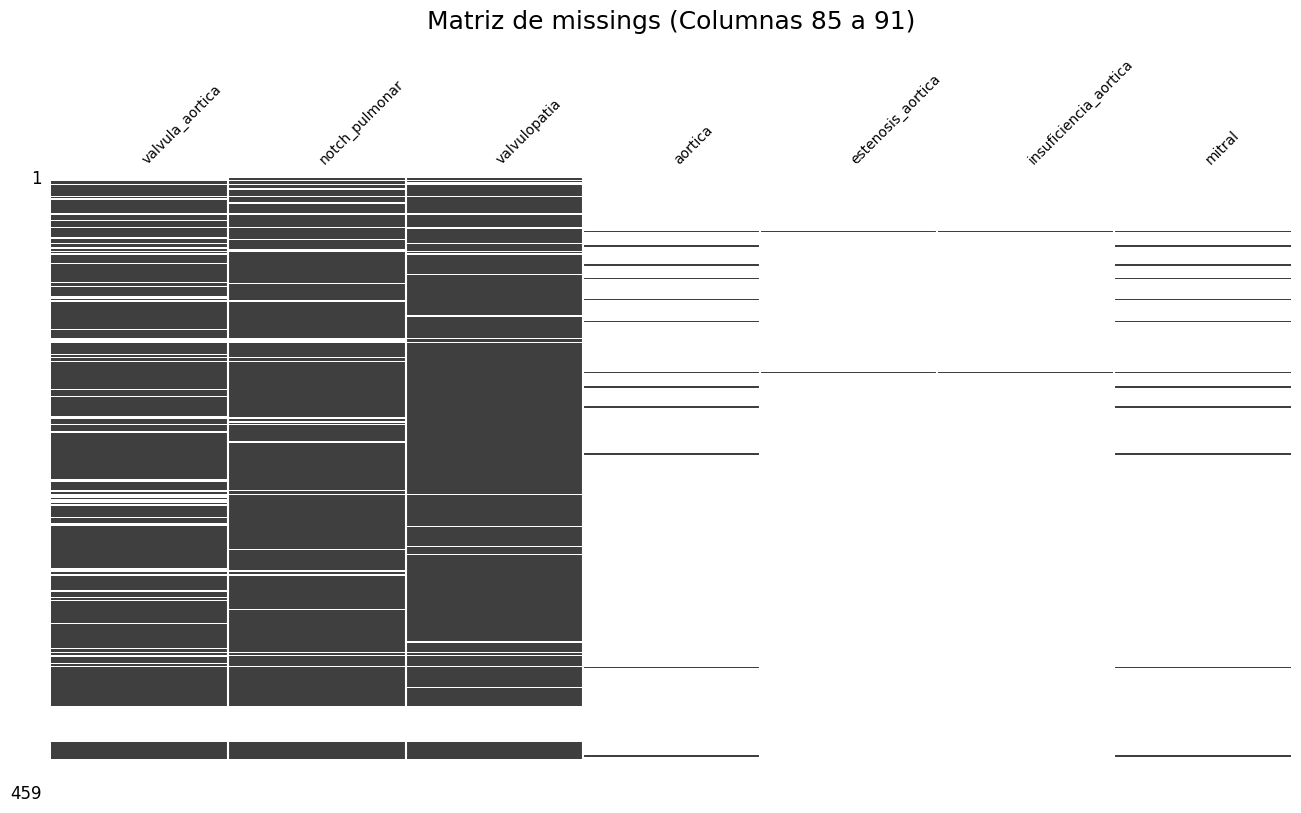

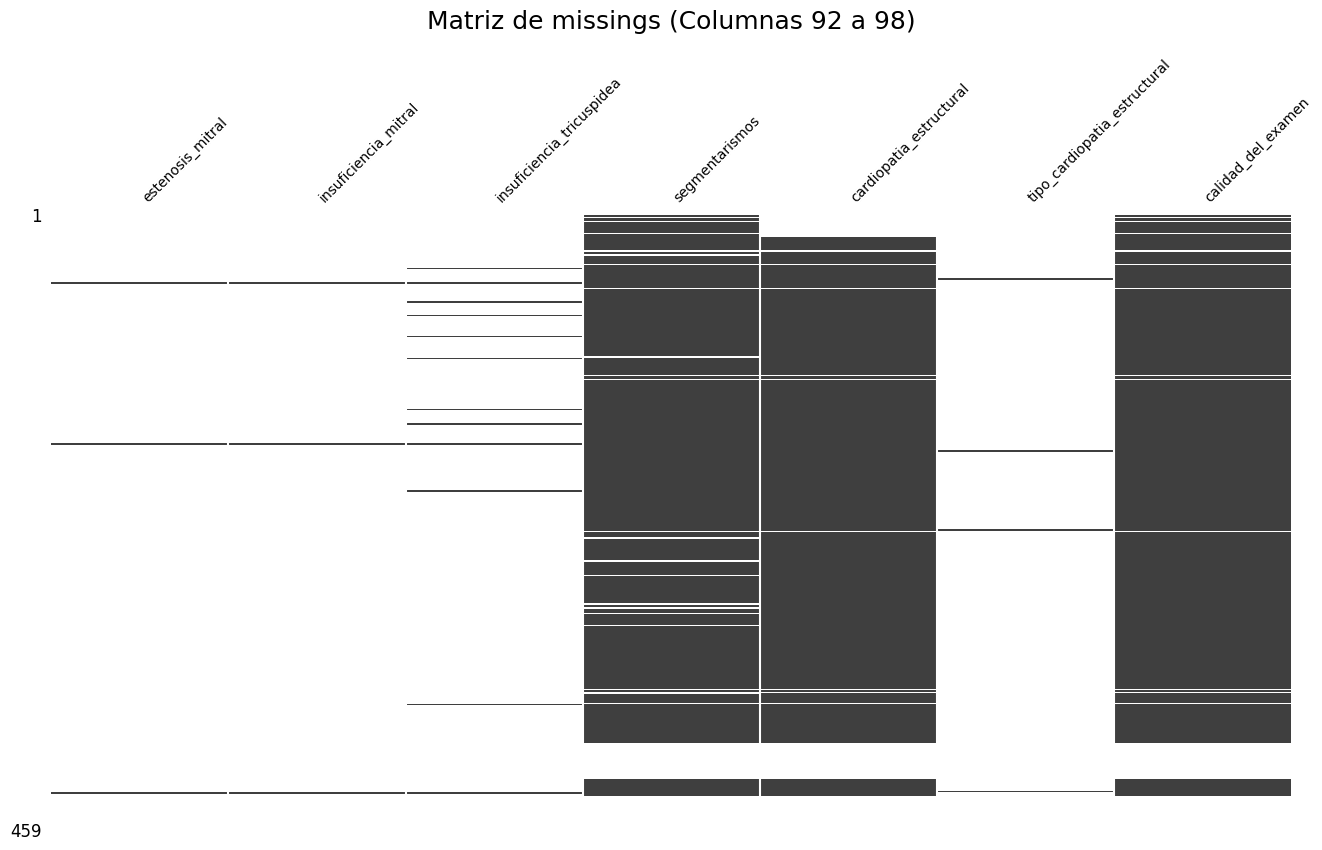

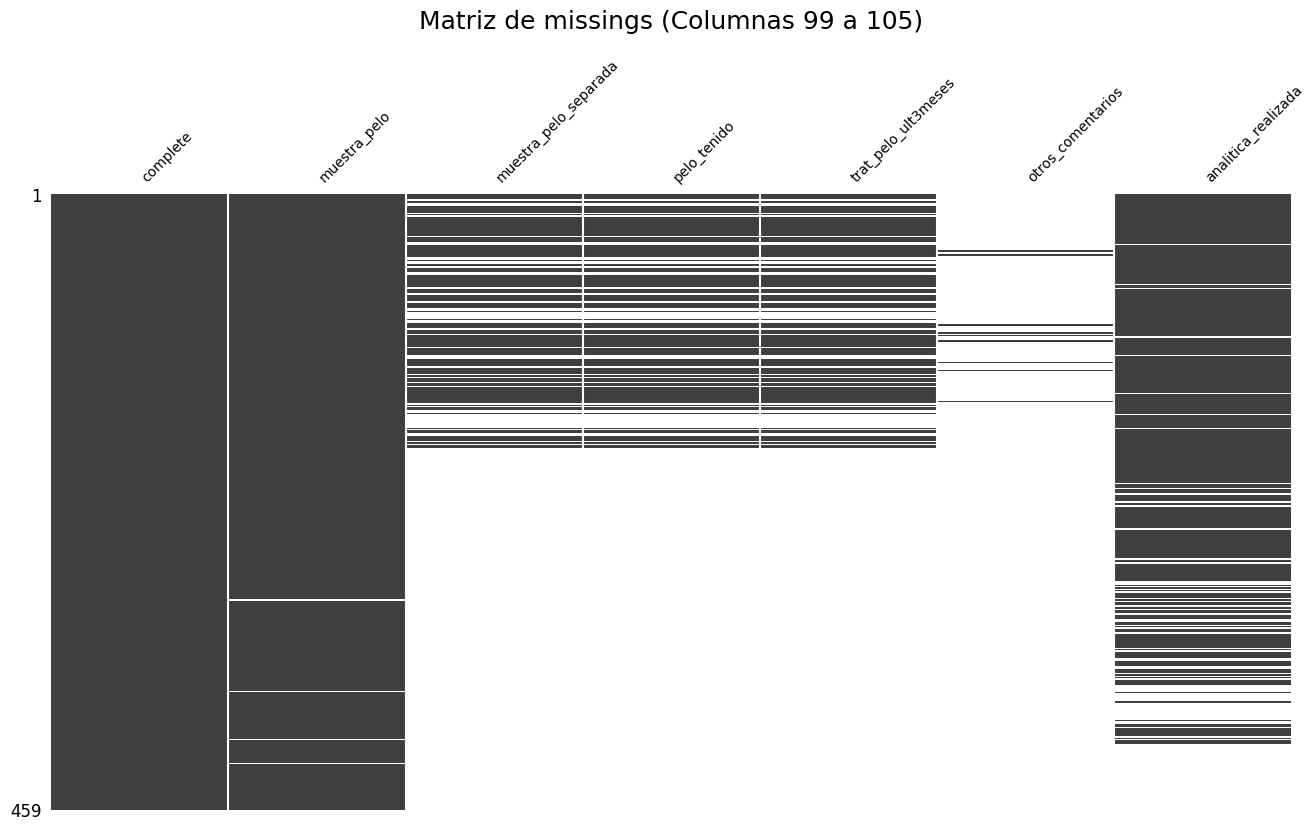

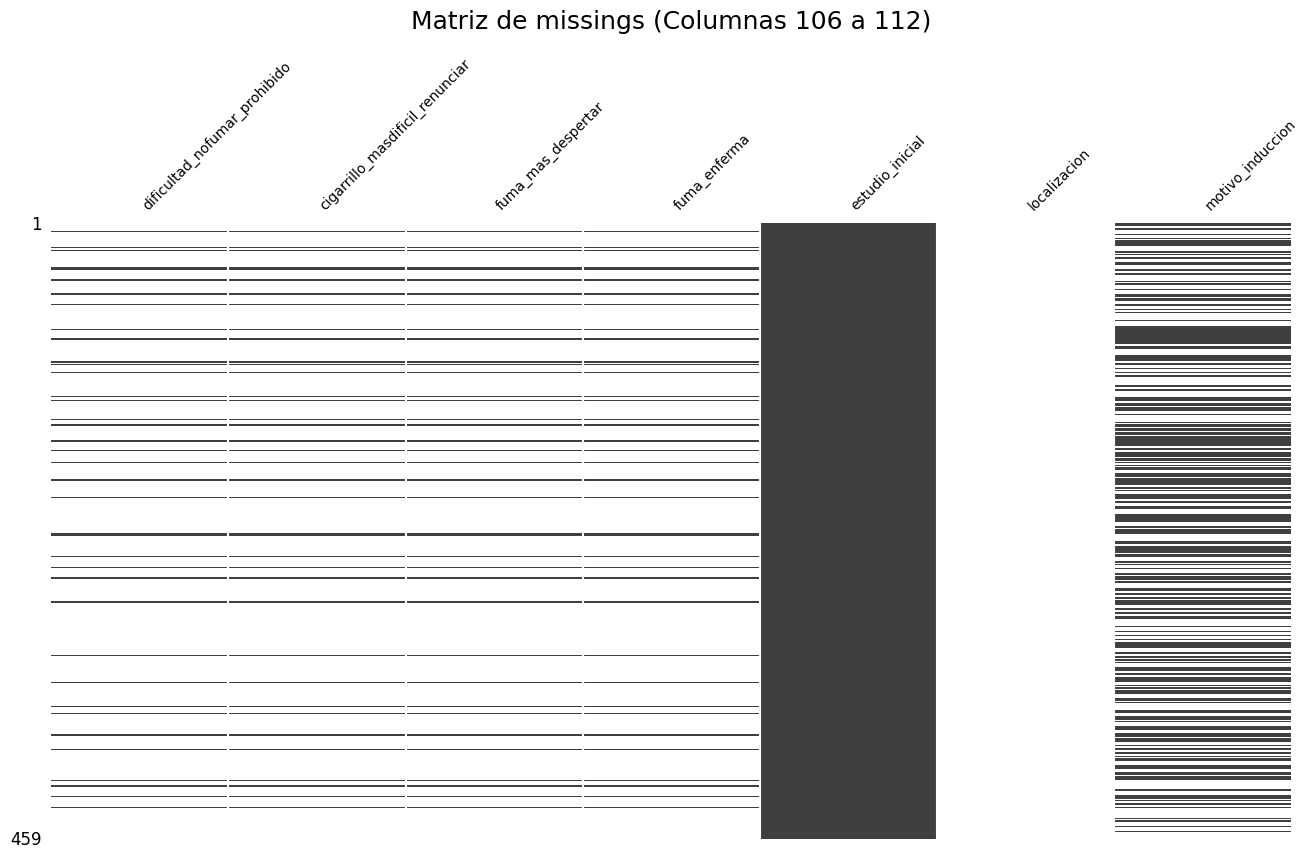

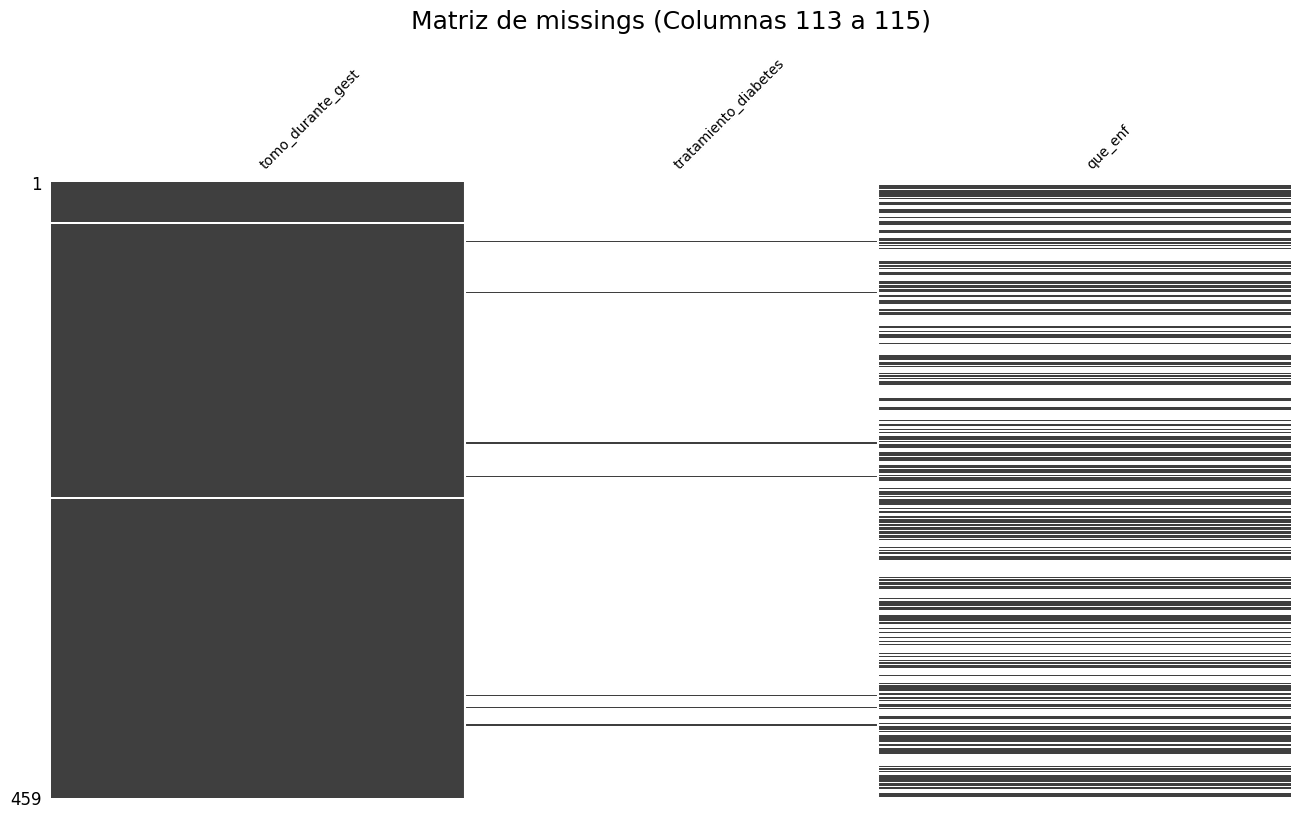

In [19]:
columnas_cat = df_missing_cat.columns.tolist()
bloque_size = 7 

# Bucle para mostrar la matriz por bloques
for i in range(0, len(columnas_cat), bloque_size):
    cols_chunk = columnas_cat[i : i + bloque_size]
    
    # Visualizamos la matriz para este bloque de categóricas
    msno.matrix(df_missing_cat[cols_chunk], figsize=(16, 8), fontsize=10, sparkline=False)
    
    plt.title(f"Matriz de missings (Columnas {i+1} a {min(i+bloque_size, len(columnas_cat))})", 
              fontsize=18, pad=20)
    plt.show()

### Matriz de missings (de df_cleaned2, que es el dataframe al que se le eliminan las filas y las columnas de >35% de missings)

#### Variables numéricas

In [20]:
# Seleccionamos solo las variables numéricas para el análisis de missings
df_mis_num = df_cleaned2.select_dtypes(include=['float64', 'int64'])
df_mis_num.shape

(459, 263)

In [21]:
# ESTO ESTÁ COMENTADO PORQUE ES APLICADO AL DATAFRAME df_cleaned2, EN EL QUE SE HAN ELIMINADO TAMBIÉN LAS COLUMNAS CON MÁS DE 35% DE MISSINGS.
# SOLO ESTÁ HECHO POR SI ACASO PUEDE SER ÚTIL EN EL FUTURO PORQUE TODAVÍA NO SABEMOS QUÉ VARIABLES SE ELIMINARÁN.
# RECORDATORIO: EN df_cleaned SE HAN ELIMINADO LAS FILAS CON MÁS DE 35% DE MISSINGS, PERO NINGUNA COLUMNA
"""# Definimos las columnas y el tamaño del bloque
columnas_2 = df_mis_num.columns.tolist()
tamano_2 = 25 

# Bucle para generar una matriz por cada grupo de columnas
for i in range(0, len(columnas_2), tamano_2):
    # Seleccionamos el subconjunto de columnas
    cols_chunk = columnas_2[i : i + tamano_2]
    
    # Creamos la matriz para este bloque
    # 'sparkline=False' para ocultar la línea de la derecha y ganar espacio
    msno.matrix(df_mis_num[cols_chunk], figsize=(16, 8), fontsize=10, sparkline = False)
    
    # Añadimos el título indicando qué variables estamos viendo
    plt.title(f"Matriz de missings (Variables {i+1} a {min(i+tamano_2, len(columnas_2))})", 
              fontsize=18, pad=20)
    
    plt.show()"""

'# Definimos las columnas y el tamaño del bloque\ncolumnas_2 = df_mis_num.columns.tolist()\ntamano_2 = 25 \n\n# Bucle para generar una matriz por cada grupo de columnas\nfor i in range(0, len(columnas_2), tamano_2):\n    # Seleccionamos el subconjunto de columnas\n    cols_chunk = columnas_2[i : i + tamano_2]\n\n    # Creamos la matriz para este bloque\n    # \'sparkline=False\' para ocultar la línea de la derecha y ganar espacio\n    msno.matrix(df_mis_num[cols_chunk], figsize=(16, 8), fontsize=10, sparkline = False)\n\n    # Añadimos el título indicando qué variables estamos viendo\n    plt.title(f"Matriz de missings (Variables {i+1} a {min(i+tamano_2, len(columnas_2))})", \n              fontsize=18, pad=20)\n\n    plt.show()'

#### Variables categóricas

In [22]:
# Seleccionamos solo las variables categóricas para el análisis de missings
df_mis_cat = df_cleaned2.select_dtypes(include=['object', 'category'])
df_mis_cat.shape

(459, 83)

In [23]:
# IDEM. ESTO ES CON df_cleaned2
"""columnas_cat_2 = df_mis_cat.columns.tolist()
bloq_size = 4 

# Bucle para mostrar la matriz por bloques
for i in range(0, len(columnas_cat_2), bloq_size):
    cols_chunk = columnas_cat_2[i : i + bloq_size]
    
    # Visualizamos la matriz para este bloque de categóricas
    msno.matrix(df_mis_cat[cols_chunk], figsize=(16, 8), fontsize=10, sparkline=False)
    
    plt.title(f"Matriz de missings (Columnas {i+1} a {min(i+bloq_size, len(columnas_cat_2))})", 
              fontsize=18, pad=20)
    plt.show()"""

'columnas_cat_2 = df_mis_cat.columns.tolist()\nbloq_size = 4 \n\n# Bucle para mostrar la matriz por bloques\nfor i in range(0, len(columnas_cat_2), bloq_size):\n    cols_chunk = columnas_cat_2[i : i + bloq_size]\n\n    # Visualizamos la matriz para este bloque de categóricas\n    msno.matrix(df_mis_cat[cols_chunk], figsize=(16, 8), fontsize=10, sparkline=False)\n\n    plt.title(f"Matriz de missings (Columnas {i+1} a {min(i+bloq_size, len(columnas_cat_2))})", \n              fontsize=18, pad=20)\n    plt.show()'

# ANÁLISIS DE DISTRIBUCIONES

El objetivo es ver si hay variables que presentan sesgos (colas) muy largas hacia algún lado, si hay desbalanceo de clases y si hay variables constantes

In [24]:
# Seleccionamos las variables categóricas de df_cleaned
cols_categoricas = df_cleaned2.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Total de variables categóricas en df_cleaned2: {len(cols_categoricas)}")
print(f"\nVariables categóricas:\n{cols_categoricas}")

Total de variables categóricas en df_cleaned2: 83

Variables categóricas:
['etnia', 'concepcion', 'parto_previo_mayor37_pre', 'parto_previo_menor37_pre', 'aborto_menor20', 'ant_cir', 'ant_peg', 'ant_obito', 'ant_pe', 'ant_hellp', 'ant_cesarea', 'ant_diabetes_pregest', 'hta_pregest', 'sindr_antifosfolipido', 'enf_autoinm', 'fuma', 'alcohol', 'drogas', 'uterinas_p95_1tri', 'plgf_1tri', 'uterinas_p95_eco_2tri', 'deter_sflt1_plgf_gest', 'ini_trabajo_parto_espontaneo', 'tipo_parto', 'sexo_rn', 'hemorragia_pospart_transfusion', 'edema_agudo_pulmon', 'histerectomia', 'otras', 'hipertension_gest', 'pe', 'sd_hellp', 'desprendimiento_placenta', 'obito_fetal', 'hemocerebral_ictus', 'embolia_tep', 'trombosis_venosa_prof', 'uci_materna_ucoi', 'covid', 'cir', 'peg', 'diabetes_gest', 'colestasis_intrahepatica', 'corioamnionitis', 'parto_mayor37_post', 'ant_fam_enfcardiovasc', 'parto_menor37_post', 'aborto_menor20_post', 'ant_cir_post', 'ant_peg_post', 'ant_obito_post', 'ant_pe_post', 'ant_hellp_post'

In [25]:
# Creamos una función para analizar distribución de variables categóricas
def analizar_distribucion_categorica(df, columna):
   # Contamos valores (incluyendo NaN)
    freq_abs = df[columna].value_counts(dropna=False)
    freq_rel = df[columna].value_counts(dropna=False, normalize=True)
    
    # Creamos DataFrame con el análisis
    analisis = pd.DataFrame({
        'Frecuencia_Absoluta': freq_abs,
        'Frecuencia_Relativa': freq_rel,
        'Porcentaje': freq_rel * 100
    })
    
    # Redondeamos los decimales
    analisis['Frecuencia_Relativa'] = analisis['Frecuencia_Relativa'].round(4)
    analisis['Porcentaje'] = analisis['Porcentaje'].round(2)
    
    return analisis

In [26]:
# Hacemos el análisis de todas las variables categóricas
print("ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CATEGÓRICAS")

for col in cols_categoricas:
    print(f"\nVariable: {col}")
    
    # Obtenemos el análisis
    dist = analizar_distribucion_categorica(df_cleaned2, col)
    
    # Mostramos la tabla
    print(dist)
    
    # Información adicional
    n_categorias = df_cleaned2[col].nunique(dropna=False)
    n_missing = df_cleaned2[col].isna().sum()
    pct_missing = (n_missing / len(df_cleaned2)) * 100
    
    print(f"\nNúmero de categorías únicas: {n_categorias}")
    print(f"Valores missing: {n_missing} ({pct_missing:.2f}%)")

ANÁLISIS DE DISTRIBUCIONES DE VARIABLES CATEGÓRICAS

Variable: etnia
                  Frecuencia_Absoluta  Frecuencia_Relativa  Porcentaje
etnia                                                                 
Blanca                            361               0.7865       78.65
Latina                             81               0.1765       17.65
Negra                              12               0.0261        2.61
Asia_Oriental                       2               0.0044        0.44
Mixto                               2               0.0044        0.44
Sureste_asiatico                    1               0.0022        0.22

Número de categorías únicas: 6
Valores missing: 0 (0.00%)

Variable: concepcion
                 Frecuencia_Absoluta  Frecuencia_Relativa  Porcentaje
concepcion                                                           
Espontanea                       378               0.8235       82.35
FIV                               37               0.0806        8.06
FI

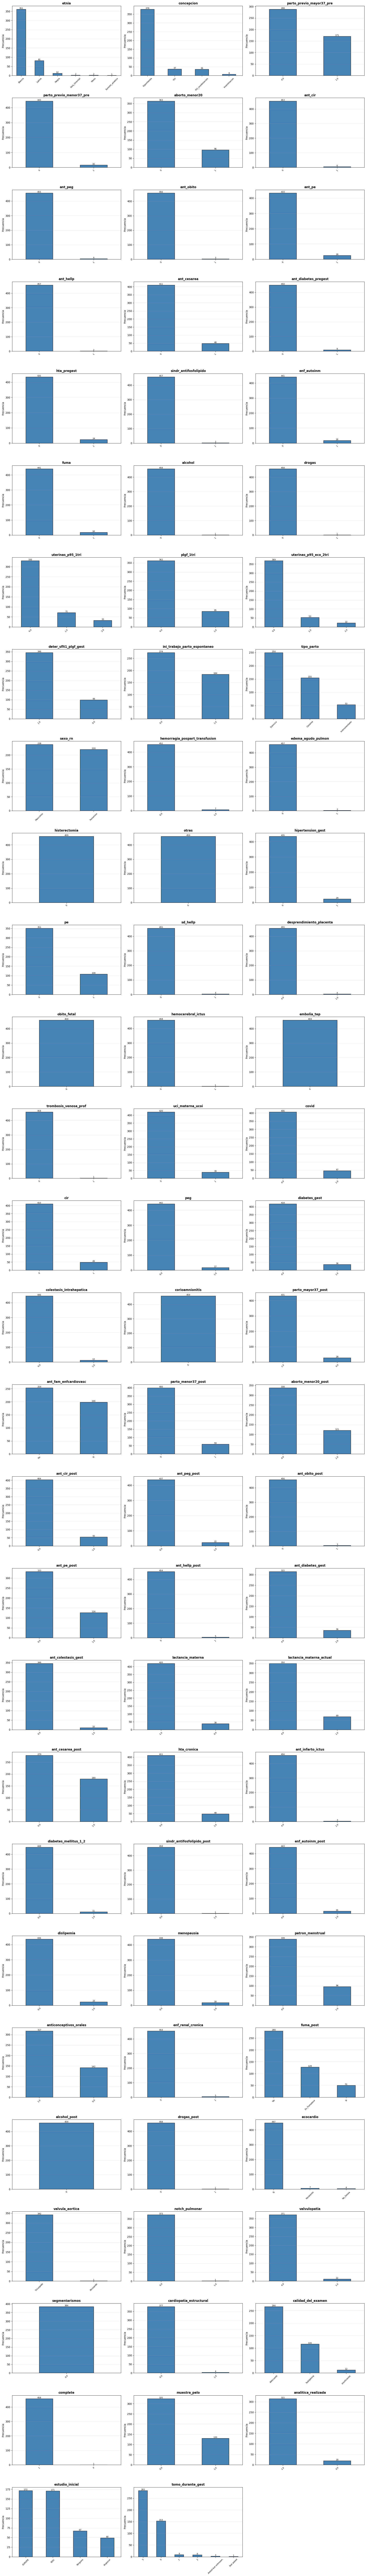

In [27]:
# Visualización de todas las variables categóricas
n_cols = 3  # Número de columnas en la cuadrícula
n_vars = len(cols_categoricas)
n_rows = math.ceil(n_vars / n_cols)

# Crear la figura
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Aplanar los ejes
if n_vars == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Bucle para crear gráficos
for i, col in enumerate(cols_categoricas):
    # Contamos valores (sin NaN para el gráfico)
    value_counts = df_cleaned2[col].value_counts()
    
    # Si hay muchas categorías, tomamos solo las top 15
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        titulo = f'{col}\n(Top 15 categorías)'
    else:
        titulo = col
    
    # Crear gráfico de barras
    if not value_counts.empty:
        value_counts.plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
        axes[i].set_title(titulo, fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].grid(axis='y', alpha=0.3)
        
        # Añadir valores en las barras
        for container in axes[i].containers:
            axes[i].bar_label(container, fontsize=8)
    else:
        axes[i].text(0.5, 0.5, f'{col}\n(Sin datos)', 
                     ha='center', va='center', transform=axes[i].transAxes)

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [28]:
# Hacemos un resumen general de todas las variables categóricas
resumen_categoricas = []

for col in cols_categoricas:
    n_total = len(df_cleaned)
    n_unicos = df_cleaned[col].nunique(dropna=False)
    n_missing = df_cleaned[col].isna().sum()
    pct_missing = (n_missing / n_total) * 100
    
    # Categoría más frecuente
    if df_cleaned[col].notna().sum() > 0:
        moda = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else 'N/A'
        freq_moda = df_cleaned[col].value_counts().iloc[0] if not df_cleaned[col].value_counts().empty else 0
        pct_moda = (freq_moda / n_total) * 100
    else:
        moda = 'N/A'
        freq_moda = 0
        pct_moda = 0
    
    resumen_categoricas.append({
        'Variable': col,
        'Num_categorias': n_unicos,
        'Missings': n_missing,
        'Pct_missing': round(pct_missing, 2),
        'Moda': moda,
        'Freq_moda': freq_moda,
        'Pct_moda': round(pct_moda, 2)
    })

# Crear DataFrame resumen
df_resumen_cat = pd.DataFrame(resumen_categoricas)

print("RESUMEN DISTRIBUCIONES")
print(df_resumen_cat.to_string(index=False))

RESUMEN DISTRIBUCIONES
                      Variable  Num_categorias  Missings  Pct_missing       Moda  Freq_moda  Pct_moda
                         etnia               6         0         0.00     Blanca        361     78.65
                    concepcion               4         0         0.00 Espontanea        378     82.35
      parto_previo_mayor37_pre               2         0         0.00        0.0        288     62.75
      parto_previo_menor37_pre               2         0         0.00          0        443     96.51
                aborto_menor20               2         0         0.00          0        363     79.08
                       ant_cir               2         0         0.00          0        453     98.69
                       ant_peg               2         0         0.00          0        455     99.13
                     ant_obito               2         0         0.00          0        456     99.35
                        ant_pe               2         0   

# ANÁLISIS DE OUTLIERS

Lo hacemos de df_cleaned (que es el dataframe sin las filas con más de 35% missings) y de df_cleaned2 (que es el dataframe al que se le han quitado las filas y las columnas con más de 35% de missings)

### Outliers (de df_cleaned)

#### Variables numéricas

In [29]:
def analizar_outliers(df):
    resultados = []

    for col in df.columns:
        # Ignorar columnas con puros valores nulos para evitar errores
        if df[col].isnull().all():
            continue
            
        total_datos = len(df[col].dropna())
        
        # Tratamiento para variables numéricas (con IQR)
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR
            
            # Contar valores fuera de los límites
            n_outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()

        # Calcular porcentaje
        porcentaje = (n_outliers / len(df)) * 100
        
        resultados.append({
            'Variable': col,
            'Cantidad outliers': n_outliers,
            'Porcentaje (%)': round(porcentaje, 2)
        })

    # Crear DataFrame de resultados y ordenar por mayor porcentaje de outliers
    df_outliers = pd.DataFrame(resultados).sort_values(by='Porcentaje (%)', ascending=False)
    return df_outliers


In [30]:
reporte_outliers = analizar_outliers(df_cleaned)

# Visualizamos el top 20 de variables con más outliers
print(reporte_outliers.head(20))

                             Variable  Cantidad outliers  Porcentaje (%)
419                olvido_usar_objeto                113           24.62
417                    hago_dos_veces                112           24.40
299        otro_controla_pensamientos                102           22.22
414                    olvido_famosos                100           21.79
342  evitar_lugares_actividades_miedo                 95           20.70
313        incomoda_personas_otrosexo                 93           20.26
364              ataques_miedo_panico                 92           20.04
327         creer_gente_sabe_pensando                 88           19.17
64                         apgar_1min                 86           18.74
309                  temblores_cuerpo                 85           18.52
351                      pensar_morir                 85           18.52
357                repetir_mucho_algo                 80           17.43
376               pensar_sexo_molesta              

In [31]:
cols_numericas = df_cleaned.select_dtypes('float', 'int')

n_colum = 4
n_vars = len(cols_numericas)
n_rows = math.ceil(n_vars / n_colum)

# Creamos la figura
fig, axes = plt.subplots(nrows=n_rows, ncols=n_colum, figsize=(20, 5 * n_rows))
axes = axes.flatten() # Convertimos la matriz en lista simple

# Bucle de graficado
for i, col in enumerate(cols_numericas):
    # ELIMINAR NaN: Esto suele prevenir el ValueError de 'positions'
    data_clean = df[col].dropna()
    
    if not data_clean.empty:
        sns.boxplot(
            x=data_clean, 
            ax=axes[i], 
            color='skyblue', 
            flierprops={'markerfacecolor':'red', 'marker':'o'}
        )
        axes[i].set_title(f'Outliers en {col}', fontsize=12)
    else:
        axes[i].text(0.5, 0.5, f'{col} está vacía', ha='center')
    
    axes[i].set_xlabel('')

# Limpiamos los subplots que sobren (si n_vars no es múltiplo de 4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outliers (de df_cleaned_2)

In [32]:
# LO COMENTAMOS PORQUE ES EL ANÁLISIS DE OUTLIERS EN df_cleaned2, QUE ES EL DATAFRAME EN EL QUE SE HAN ELIMINADO LAS COLUMNAS CON MÁS DE 35% DE MISSINGS, PERO TODAVÍA NO SABEMOS QUÉ VARIABLES SE ELIMINARÁN, ASÍ QUE LO DEJAMOS POR SI PUEDE SER ÚTIL EN EL FUTURO.
"""# Identificamos y analizar los outliers en df_cleaned_2
reporte_outliers_2 = analizar_outliers(df_cleaned2)

print("Reporte de outliers (df_cleaned2)\n")
print(reporte_outliers_2.head(20)) # Mostramos las 20 variables con más outliers

# Seleccionamos solo las columnas numéricas para los boxplots
cols_numericas_2 = df_cleaned2.select_dtypes(include=['number']).columns.tolist()

# Configuración de la cuadrícula (4 gráficos por fila)
n_cols_deseado = 4
n_vars = len(cols_numericas_2)

if n_vars == 0:
    print("No hay variables numéricas en df_cleaned2 para graficar.")
else:
    n_rows = math.ceil(n_vars / n_cols_deseado)

    # Crear la figura
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_deseado, figsize=(20, 5 * n_rows))

    # Aplanar los ejes para poder iterar fácilmente (manejando caso de 1 solo gráfico)
    if n_vars == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Bucle para generar los Boxplots
    for i, col in enumerate(cols_numericas_2):
        # Limpieza de nulos por columna para asegurar que el boxplot no falle
        data_clean = df_cleaned2[col].dropna()
        
        if not data_clean.empty:
            sns.boxplot(
                x=data_clean, 
                ax=axes[i], 
                color='lightgreen', # Usamos verde para diferenciar de la visualización anterior
                flierprops={'markerfacecolor':'red', 'marker':'o', 'markersize': 5}
            )
            axes[i].set_title(f'Outliers en {col}', fontsize=12, fontweight='bold')
        else:
            # Texto informativo si la columna terminó vacía tras el dropna
            axes[i].text(0.5, 0.5, f'{col}\n(Sin datos numéricos)', 
                         ha='center', va='center', transform=axes[i].transAxes)
        
        axes[i].set_xlabel('')

    # Eliminar los subplots que queden vacíos al final de la cuadrícula
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()"""

'# Identificamos y analizar los outliers en df_cleaned_2\nreporte_outliers_2 = analizar_outliers(df_cleaned2)\n\nprint("Reporte de outliers (df_cleaned2)\n")\nprint(reporte_outliers_2.head(20)) # Mostramos las 20 variables con más outliers\n\n# Seleccionamos solo las columnas numéricas para los boxplots\ncols_numericas_2 = df_cleaned2.select_dtypes(include=[\'number\']).columns.tolist()\n\n# Configuración de la cuadrícula (4 gráficos por fila)\nn_cols_deseado = 4\nn_vars = len(cols_numericas_2)\n\nif n_vars == 0:\n    print("No hay variables numéricas en df_cleaned2 para graficar.")\nelse:\n    n_rows = math.ceil(n_vars / n_cols_deseado)\n\n    # Crear la figura\n    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols_deseado, figsize=(20, 5 * n_rows))\n\n    # Aplanar los ejes para poder iterar fácilmente (manejando caso de 1 solo gráfico)\n    if n_vars == 1:\n        axes = [axes]\n    else:\n        axes = axes.flatten()\n\n    # Bucle para generar los Boxplots\n    for i, col in e

# REUNIÓN 3

HAY QUE HACER:
- Tomar el dataset df_cleaned2 (pacientes y variables con más de 35% de missings eliminados)
- Eliminar todas las variables con más de 25% de missings (excepto hemoglobina, hematocrito, leucocitos, plaquetas, glucosa, sodio, potasio, urato, hb glicada, ast, alt, bilirrubina, ldh, vldl, ldl, hdl, colesterol, triglicéridos, proteínas totales)
- Apuntar variables categóricas con categorías poco representadas 
- Apuntar variables con outliers que podrían ser errores
- Asegurar que todas las variables leve-moderado-severo son categóricas ordinales

## Eliminar todas las variables con más de 25% de missings

In [33]:
var_clinicas = ['hemoglobina', 'hematocrito', 'leucocitos', 'plaquetas', 'glucosa', 'sodio', 
                'potasio', 'urato_acidourico', 'hemoglobina_glicada', 'ast', 'alt', 'bilirubina_total', 
                'ldh', 'vldl', 'ldl', 'hdl', 'colesterol_total', 'trigliceridos', 'prote_totales_orina']

In [34]:
porcentaje_nulos = df_cleaned2.isnull().mean()
columnas_mas25 = porcentaje_nulos[porcentaje_nulos > 0.25].index.tolist()

# Filtramos la lista de eliminación para excluir las variables clínicas
columnas_a_eliminar = [col for col in columnas_mas25 if col not in var_clinicas]

# Eliminamos las columnas del DataFrame
df_limpio = df_cleaned2.drop(columns=columnas_a_eliminar)

# Imprimimos qué columnas se eliminaron para verificar
print(f"Columnas eliminadas: {len(columnas_a_eliminar)} \n{columnas_a_eliminar}")

Columnas eliminadas: 16 
['fecha_ult_deter', 'eg_deter_sflt1_plgf', 'valor_sflt1', 'valor_plgf', 'ratio_sflt1_plgf', 'tiempo_anticonceptivos_orales', 'valvula_aortica', 'diam_longitudinal_vd', 'presion_estimada_ad', 'ic_tsvi', 'vs_camara_salida_vi_indexado', 'analitica_realizada', 'fecha_extraccion', 'creatinina', 'resultado_iberliferisk_score_hasta_los_75_anos', 'vasos_agua_dia']


Nota: se elimina 'fecha_extraccion', que es la fecha en la que se hizo la análitica de todas las variables clínicas

## Categorías Poco Representadas y Posibles Errores

In [38]:
# Análisis de categorías poco representadas (<5%) en variables categóricas
print("CATEGORÍAS POCO REPRESENTADAS (<5%):\n")

cat_cols = df_limpio.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    val_counts = df_limpio[col].value_counts(normalize=True)
    poco_representadas = val_counts[val_counts < 0.05]
    if not poco_representadas.empty:
        print(f"Variable: {col}")
        for cat, prop in poco_representadas.items():
            print(f"  - '{cat}': {prop*100:.2f}%")


CATEGORÍAS POCO REPRESENTADAS (<5%):

Variable: etnia
  - 'Negra': 2.61%
  - 'Asia_Oriental': 0.44%
  - 'Mixto': 0.44%
  - 'Sureste_asiatico': 0.22%
Variable: concepcion
  - 'Inseminacion': 1.74%
Variable: parto_previo_menor37_pre
  - '1': 3.49%
Variable: ant_cir
  - '1': 1.31%
Variable: ant_peg
  - '1': 0.87%
Variable: ant_obito
  - '1': 0.65%
Variable: ant_hellp
  - '1': 0.44%
Variable: ant_diabetes_pregest
  - '1': 1.96%
Variable: sindr_antifosfolipido
  - '1': 0.44%
Variable: enf_autoinm
  - '1': 3.92%
Variable: fuma
  - '1': 3.92%
Variable: alcohol
  - '1': 0.22%
Variable: drogas
  - '1': 0.22%
Variable: uterinas_p95_eco_2tri
  - '2.0': 4.95%
Variable: hemorragia_pospart_transfusion
  - '1.0': 1.53%
Variable: edema_agudo_pulmon
  - '1': 0.44%
Variable: sd_hellp
  - '1': 0.87%
Variable: desprendimiento_placenta
  - '1.0': 0.87%
Variable: hemocerebral_ictus
  - '1': 0.22%
Variable: trombosis_venosa_prof
  - '1': 0.22%
Variable: peg
  - '1.0': 3.70%
Variable: colestasis_intrahepatica

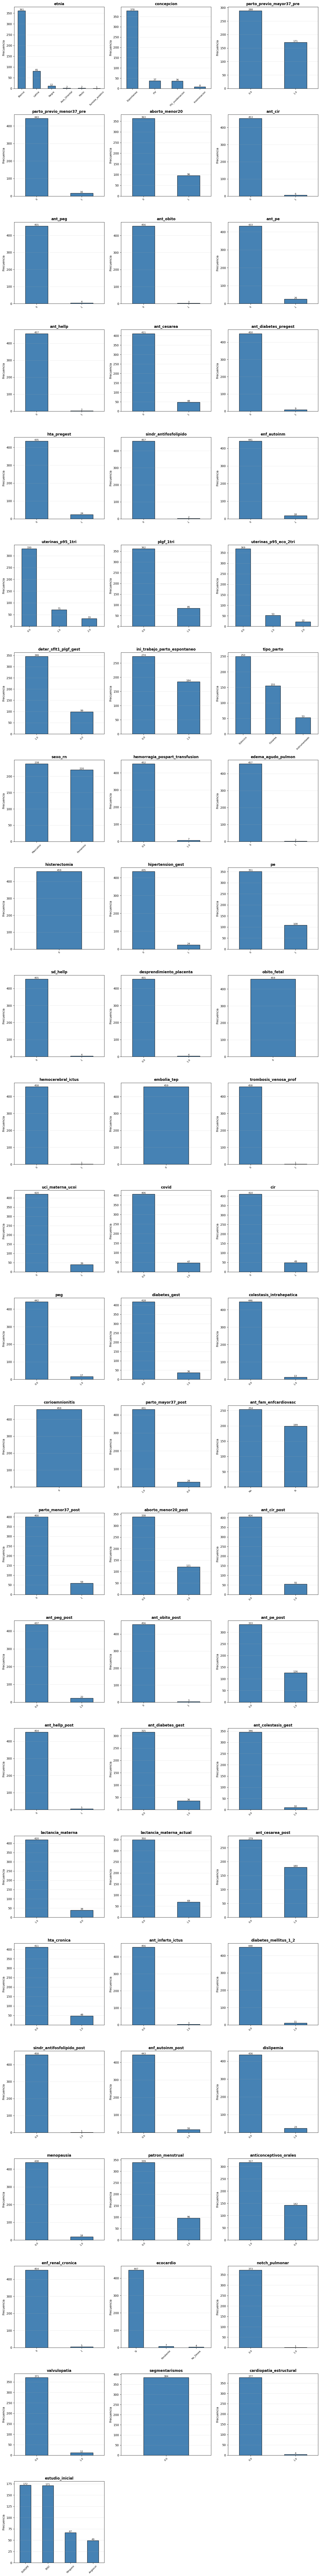

In [ ]:
# Identificar columnas categóricas
cat_cols = df_limpio.select_dtypes(include=['object', 'category']).columns
cat_cols = cat_cols.drop(['fuma', 'alcohol', 'drogas', 'otras', 'muestra_pelo', 'tomo_durante_gest', 'complete', 'calidad_del_examen', 'drogas_post', 'alcohol_post', 'fuma_post'])
n_cols_cat = len(cat_cols)

# Configuración de la cuadrícula 
cols_grid = 3
rows_grid = math.ceil(n_cols_cat / cols_grid)

# Crear la figura y los ejes correctamente
fig, axes = plt.subplots(rows_grid, cols_grid, figsize=(15, 5 * rows_grid))
axes = axes.flatten() # Convertimos la matriz de ejes en una lista simple

# Bucle para crear gráficos
for i, col in enumerate(cat_cols):
    # Contamos valores
    value_counts = df_limpio[col].value_counts()
    
    # Si hay muchas categorías, tomamos solo las top 15
    if len(value_counts) > 15:
        value_counts = value_counts.head(15)
        titulo = f'{col}\n(Top 15 categorías)'
    else:
        titulo = col
    
    # Crear gráfico de barras
    if not value_counts.empty:
        value_counts.plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
        axes[i].set_title(titulo, fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].grid(axis='y', alpha=0.3)
        
        # Añadir valores en las barras
        for container in axes[i].containers:
            axes[i].bar_label(container, fontsize=8)
    else:
        axes[i].text(0.5, 0.5, f'{col}\n(Sin datos)', 
                     ha='center', va='center', transform=axes[i].transAxes)

# Eliminar subplots sobrantes (si la cuadrícula es más grande que el número de variables)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Detectar outliers extremos que puedan ser errores 
print("OUTLIERS EXTREMOS (POSIBLES ERRORES) Y SUS IDs (Carnet de Paciente):\n")

num_cols = df_limpio.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

for col in num_cols:
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Límite extremo (3 veces el IQR, no 1.5)
    limite_inferior = Q1 - 3 * IQR
    limite_superior = Q3 + 3 * IQR
    
    # Buscar registros que se salgan de estos límites
    anomalos = df_limpio[(df_limpio[col] < limite_inferior) | (df_limpio[col] > limite_superior)]
    
    if not anomalos.empty:
        outliers_dict[col] = anomalos['id'].tolist()
        print(f"Variable '{col}': {len(anomalos)} posibles errores.")
        print(f"  IDs (Carnet de Paciente): {anomalos['id'].tolist()} ...") 


OUTLIERS EXTREMOS (POSIBLES ERRORES) Y SUS IDs (Carnet de Paciente):

Variable 'peso_ini_gest': 1 posibles errores.
  IDs (Carnet de Paciente): [653] ...
Variable 'peso_fin_gest': 1 posibles errores.
  IDs (Carnet de Paciente): [653] ...
Variable 'aumento_peso_gest': 4 posibles errores.
  IDs (Carnet de Paciente): [43, 173, 194, 372] ...
Variable 'imc_ini_gest': 2 posibles errores.
  IDs (Carnet de Paciente): [620, 653] ...
Variable 'eg_eco_1tri': 5 posibles errores.
  IDs (Carnet de Paciente): [15, 392, 568, 616, 647] ...
Variable 'eg_parto': 7 posibles errores.
  IDs (Carnet de Paciente): [55, 215, 383, 585, 610, 634, 647] ...
Variable 'apgar_1min': 86 posibles errores.
  IDs (Carnet de Paciente): [1, 4, 10, 13, 14, 19, 26, 39, 43, 63, 69, 95, 101, 113, 124, 127, 130, 137, 138, 139, 143, 149, 169, 181, 194, 213, 215, 226, 238, 251, 268, 269, 288, 290, 294, 299, 309, 315, 319, 320, 322, 329, 332, 335, 340, 341, 343, 354, 355, 359, 363, 374, 395, 400, 403, 404, 417, 423, 427, 430, 433,

## Imputación con MissForest

In [42]:
# Implementación de MissForest para Imputación
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


print("Iniciando preparación para MissForest...")

# Hacemos una copia profunda
df_imputar = df_limpio.copy()

# Guardamos las variables numéricas y categóricas
num_cols = df_imputar.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_imputar.select_dtypes(include=['object', 'category']).columns.tolist()

# Necesitamos convertir las fechas a numérico o quitarlas temporalmente para MissForest
datetime_cols = df_imputar.select_dtypes(include=['datetime64[ns]']).columns.tolist()
if datetime_cols:
    print(f"Ignorando temporalmente variables de fecha para MissForest: {datetime_cols}")
    df_imputar_modelo = df_imputar.drop(columns=datetime_cols)
else:
    df_imputar_modelo = df_imputar.copy()

# Para usar IterativeImputer con RandomForestRegressor de sklearn en datos mixtos,
# es necesario codificar ordinalmente las categóricas y luego revertirlas.
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Solo codificamos columnas categóricas, pero debemos tener cuidado de no imputar NaN todavía
df_encoded = df_imputar_modelo.copy()

for col in cat_cols:
    if col in df_encoded.columns:
        # Convertimos la columna a float en pandas 3+ para permitir sobreescribir con valores numéricos
        try:
            df_encoded[col] = pd.to_numeric(df_encoded[col])
        except (ValueError, TypeError):
            pass
        
        nonulls = df_encoded[col].dropna().values.reshape(-1, 1)
        if len(nonulls) > 0:
            # Reasignamos a través de un array para evitar type errors de pandas si la columna sigue siendo object purista
            encoded_vals = encoder.fit_transform(nonulls).flatten()
            
            # Generamos columna nueva de floats y luego reemplazamos para no chocar con pd.StringDtype
            col_temp = df_encoded[col].copy()
            col_temp.loc[col_temp.notna()] = encoded_vals
            df_encoded[col] = col_temp.astype('float')

# Ejecutamos MissForest (IterativeImputer con RandomForestRegressor)
print("Ejecutando MissForest... Esto puede tardar varios minutos.")
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=50, random_state=42), 
                           max_iter=5, random_state=42)

df_imputed_array = imputer.fit_transform(df_encoded)

# Reconstruir el DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns, index=df_encoded.index)

# Revertir el Ordinal Encoding para las categóricas
print("Revirtiendo codificación para variables categóricas...")
for col in cat_cols:
    if col in df_imputed.columns:
        # Redondeamos a entero más cercano porque RandomForest devuelve floats
        df_imputed[col] = np.round(df_imputed[col])
        # Revertir puede fallar si la categoría no existía, pero IterativeImputer interpola
        nonulls = df_limpio[col].dropna().values.reshape(-1, 1)
        if len(nonulls) > 0:
            encoder.fit(nonulls)
            # Clip limits to prevent index out of bounds due to rounding
            max_val = len(encoder.categories_[0]) - 1
            df_imputed[col] = df_imputed[col].clip(lower=0, upper=max_val)
            df_imputed[col] = encoder.inverse_transform(df_imputed[col].values.reshape(-1, 1)).flatten()

# Juntar de nuevo con las fechas
if datetime_cols:
    df_final_imputado = pd.concat([df_imputed, df_limpio[datetime_cols]], axis=1)
else:
    df_final_imputado = df_imputed.copy()

print("¡Imputación con MissForest completada con éxito!")
# Mostramos que ya no hay missings en df_final_imputado
print(f"Total missings ahora: {df_final_imputado.isna().sum().sum()}")


Iniciando preparación para MissForest...
Ignorando temporalmente variables de fecha para MissForest: ['fecha_firma_ci_cardiomom', 'fecha_firma_ci_muestbio', 'fecha_nac', 'fur_pre', 'fecha_eco_1tri', 'fecha_parto', 'fecha_exploracion', 'fur_post', 'survey_timestamp_estres', 'survey_timestamp_scl90r', 'survey_timestamp_memoria']
Ejecutando MissForest... Esto puede tardar varios minutos.
Revirtiendo codificación para variables categóricas...
¡Imputación con MissForest completada con éxito!
Total missings ahora: 165


## Exportar dataset final

In [43]:
if 'id' in df_final_imputado.columns:
    df_final_imputado['id'] = df_final_imputado['id'].astype(int)

# Guardamos el dataset definitivo (procesado e imputado) para su uso en futuras libretas.
df_final_imputado.to_csv('datos_reunion2.csv', index=False)
print("Dataset guardado correctamente como 'datos_reunion2.csv'")

Dataset guardado correctamente como 'datos_reunion2.csv'
